# PROJET 9: Produisez une étude de marché avec R ou Python

### NOTEBOOK 2

##  I- Importation des outils et données

In [52]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

import plotly.express as px

from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.cluster import KMeans

from sklearn. decomposition import PCA, KernelPCA

from sklearn. preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer

In [53]:
from warnings import filterwarnings
filterwarnings('ignore') 

In [54]:
# On charde seaborn

sns.set()

In [55]:
daframe_final = pd.read_csv('data_preprocess_jointure_final_projet_9_csv', index_col = 0)
daframe_final.head()

pays  \
0     Afghanistan   
1  Afrique du Sud   
2         Albanie   
3         Algérie   
4       Allemagne   

   ('Valeur', 'Nombre de femmes adultes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')  \
0                                                1.9                                                                   
1                                                0.0                                                                   
2                                                0.1                                                                   
3                                                1.7                                                                   
4                                                0.2                                                                   

   ('Valeur', 'Nombre de femmes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)')  \
0                                                5.7                                                                              
1                                                0.0                                                                              
2                                                0.5                                                                              
3                                                2.9                                                                              
4                                                1.0                                                                              

   ('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')  \
0                                                7.9                                                              
1                                                0.0                                                              
2                                                0.4                                                              
3                                                6.1                                                              
4                                                0.8                                                              

   ('Valeur', 'Nombre d’hommes adultes en situation d’insécurité alimentaire modérée ou grave (millions) (moyenne sur 3 ans)')  \
0                                                5.3                                                                             
1                                                0.0                                                                             
2                                                0.4                                                                             
3                                                2.5                                                                             
4                                                1.3                                                                             

   Disponibilité alimentaire (Kcal/personne/jour)  Disponibilité intérieure  \
0                                             5.0                      57.0   
1                                           143.0                    2118.0   
2                                            85.0                      47.0   
3                                            22.0                     277.0   
4                                            71.0                    1739.0   

   Exportations - Quantité  Importations - Quantité  Population totale  \
0               132.185185                     29.0          36296.113   
1                63.000000                    514.0          57009.756   
2                 0.000000                     38.0           2884.169   
3                 0.000000                      2.0          41389.189   
4               646.000000                    842.0          

In [56]:
daframe_final = daframe_final.set_index('pays')

Nous allons sélectionner d'abord que certaines colones :

In [57]:
cols = ["Disponibilité intérieure","Exportations - Quantité",
        "Importations - Quantité","Production",
        "Disponibilité alimentaire (Kcal/personne/jour)",
        "Population totale",
        "('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')"]

In [58]:
daframe_final = daframe_final[cols]
daframe_final.head()

Disponibilité intérieure  Exportations - Quantité  \
pays                                                                
Afghanistan                         57.0               132.185185   
Afrique du Sud                    2118.0                63.000000   
Albanie                             47.0                 0.000000   
Algérie                            277.0                 0.000000   
Allemagne                         1739.0               646.000000   

                Importations - Quantité  Production  \
pays                                                  
Afghanistan                        29.0        28.0   
Afrique du Sud                    514.0      1667.0   
Albanie                            38.0        13.0   
Algérie                             2.0       275.0   
Allemagne                         842.0      1514.0   

                Disponibilité alimentaire (Kcal/personne/jour)  \
pays                                                             
Afghanistan                                                5.0   
Afrique du Sud                                           143.0   
Albanie                                                   85.0   
Algérie                                                   22.0   
Allemagne                                                 71.0   

                Population totale  \
pays                                
Afghanistan             36296.113   
Afrique du Sud          57009.756   
Albanie                  2884.169   
Algérie                 41389.189   
Allemagne               82658.409   

                ('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')  
pays                                                                                                                          
Afghanistan                                                   7.9                                                             
Afrique du Sud                                                0.0                                                             
Albanie                                                       0.4                                                             
Algérie                                                       6.1                                                             
Allemagne                                                     0.8

In [59]:
daframe_final.shape

(172, 7)

In [60]:
daframe_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Afghanistan to Îles Salomon
Data columns (total 7 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Disponibilité intérieure                                                                                      172 non-null    float64
 1   Exportations - Quantité                                                                                       172 non-null    float64
 2   Importations - Quantité                                                                                       172 non-null    float64
 3   Production                                                                                                    172 non-null    float64
 4   Disponibilité alimentaire (Kcal/personne/jo

In [61]:
daframe_final.isna().mean()

Disponibilité intérieure                                                                                        0.0
Exportations - Quantité                                                                                         0.0
Importations - Quantité                                                                                         0.0
Production                                                                                                      0.0
Disponibilité alimentaire (Kcal/personne/jour)                                                                  0.0
Population totale                                                                                               0.0
('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')    0.0
dtype: float64

In [62]:
daframe_final.duplicated().sum()

0

In [63]:
daframe_final.nunique()

Disponibilité intérieure                                                                                        136
Exportations - Quantité                                                                                          51
Importations - Quantité                                                                                          85
Production                                                                                                      126
Disponibilité alimentaire (Kcal/personne/jour)                                                                  112
Population totale                                                                                               172
('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')     54
dtype: int64

In [64]:
daframe_final.describe()

Disponibilité intérieure  Exportations - Quantité  \
count                172.000000               172.000000   
mean                 687.594118               132.185185   
std                 2174.356574               454.815536   
min                    2.000000                 0.000000   
25%                   31.500000                 0.000000   
50%                  105.000000                 8.500000   
75%                  376.500000               132.185185   
max                18266.000000              4223.000000   

       Importations - Quantité    Production  \
count               172.000000    172.000000   
mean                 89.529412    725.190476   
std                 185.575135   2472.027193   
min                   0.000000      0.000000   
25%                   3.000000     14.750000   
50%                  16.000000     74.500000   
75%                  85.250000    503.000000   
max                1069.000000  21914.000000   

       Disponibilité alimentaire (Kcal/personne/jour)  Population totale  \
count                                      172.000000       1.720000e+02   
mean                                        74.558140       4.284175e+04   
std                                         60.571277       1.530637e+05   
min                                          0.000000       5.204500e+01   
25%                                         22.000000       2.874480e+03   
50%                                         64.000000       9.757833e+03   
75%                                        105.500000       3.013874e+04   
max                                        243.000000       1.421022e+06   

       ('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')  
count                                         172.000000                                                             
mean                                            2.162209                                                             
std                                             5.073993                                                             
min                                             0.000000                                                             
25%                                             0.000000                                                             
50%                                             0.100000                                                             
75%                                             1.500000                                                             
max                                            40.700000

## 1- Nous pouvons - enfin - commencer notre ACP, ou notre PCA !

### Commençons par scaler les données. On instancie :

In [65]:
X = daframe_final.values
X[:5]

array([[5.70000000e+01, 1.32185185e+02, 2.90000000e+01, 2.80000000e+01,
        5.00000000e+00, 3.62961130e+04, 7.90000000e+00],
       [2.11800000e+03, 6.30000000e+01, 5.14000000e+02, 1.66700000e+03,
        1.43000000e+02, 5.70097560e+04, 0.00000000e+00],
       [4.70000000e+01, 0.00000000e+00, 3.80000000e+01, 1.30000000e+01,
        8.50000000e+01, 2.88416900e+03, 4.00000000e-01],
       [2.77000000e+02, 0.00000000e+00, 2.00000000e+00, 2.75000000e+02,
        2.20000000e+01, 4.13891890e+04, 6.10000000e+00],
       [1.73900000e+03, 6.46000000e+02, 8.42000000e+02, 1.51400000e+03,
        7.10000000e+01, 8.26584090e+04, 8.00000000e-01]])

In [66]:
type(X)

numpy.ndarray

In [67]:
X.shape

(172, 7)

In [68]:
# Stockage des noms des colonnes dans une liste

features = daframe_final.columns.tolist()
features

# Ici nous avons ajouter la methode .tolist() pour obtenir notre liste

['Disponibilité intérieure',
 'Exportations - Quantité',
 'Importations - Quantité',
 'Production',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Population totale',
 "('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')"]

In [69]:
# Nous enregistrons les noms de nos pays dans une variable names

names = daframe_final.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='pays', length=172)

In [70]:
scaler = StandardScaler()

In [71]:
# On fit :

scaler.fit(X)

StandardScaler()

In [72]:
# On transforme

X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.29086088,  0.        , -0.32712432, -0.28285533, -1.15172129,
        -0.04288902,  1.1341252 ],
       [ 0.65977323, -0.15256116,  2.29400303,  0.38209909,  1.1332383 ,
         0.09283303, -0.42737984],
       [-0.29547337, -0.29148329, -0.27848485, -0.28894094,  0.17289296,
        -0.26181418, -0.34831629],
       [-0.18938611, -0.29148329, -0.47304275, -0.18264561, -0.87024076,
        -0.00951765,  0.77833924],
       [ 0.48495987,  1.1330198 ,  4.06664173,  0.32002586, -0.05891453,
         0.26089076, -0.26925275]])

In [73]:
# Rappelons qu'on peut faire les 2 opérations en une seule :

X_scaled = scaler.fit_transform(X)

In [74]:
# On espère avoir une moyenne à 0 et un écart type à 1 :

idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6
mean  0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0

## 2- PCA

In [75]:
# Nous allons travailler que sur les 6 premières composantes :

n_components = 6

In [76]:
# On instancie notre ACP :

pca = PCA(n_components=n_components)

In [77]:
# On l'entraine sur les données scalées :

pca.fit(X_scaled)

PCA(n_components=6)

Intéressons nous maintenant à la variance captée par chaque nouvelle composante. Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_ :

In [78]:
pca.explained_variance_ratio_

array([0.45045147, 0.19673101, 0.1330643 , 0.11378164, 0.08261227,
       0.02320789])

Ici la 1ère composante capte 45% de la variance de nos données initiales, la 2ème 19% etc etc.

In [79]:
# Enregistrons cela dans une variable :

scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([45.05, 19.67, 13.31, 11.38,  8.26,  2.32])

Les 2 premières composantes captent donc 45+19 = 64% de la variance, les 3 premières 13+11+8 = 32% de la variance etc etc.

Dans le jargon, cela s'appelle une somme cumulée. Et pour faire une somme cumulée numpy dispose de la fonction cumsum :

In [80]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 45.,  65.,  78.,  89.,  98., 100.])

In [81]:
# Définisons ensuite une variable avec la liste de nos composantes :

x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

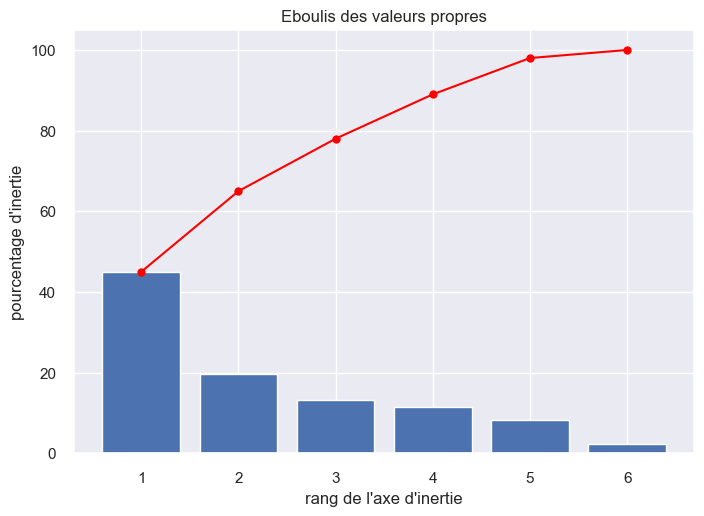

In [82]:
# On peut enfin l'afficher de façon graphique :

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 80% de la variance est comprise dans les 3 premières composantes, et près de 90% dans les 4 premières.

##  3- Composantes

Intéressons nous maintenant à nos fameuses composantes.

La formule de calcul de composantes nous est donnée par l'attribut components_. Cette variable est généralement nommée pcs :

In [83]:
pcs = pca.components_
pcs

array([[ 0.54850502,  0.43455164,  0.1800007 ,  0.55112272,  0.14905911,
         0.38300566,  0.07251664],
       [ 0.03363215, -0.08284061, -0.31199307,  0.02997144, -0.65027883,
         0.2841354 ,  0.62463819],
       [-0.01610747,  0.41553919, -0.75372187,  0.11162377,  0.27630259,
        -0.38855361,  0.13854306],
       [ 0.1019975 , -0.26045115, -0.53113323,  0.07777465, -0.12041599,
         0.45547663, -0.6416006 ],
       [ 0.00407021, -0.46885538, -0.1303078 , -0.0776691 ,  0.67517269,
         0.35750291,  0.41650807],
       [-0.50108262,  0.57181022,  0.027914  , -0.35561884,  0.09064766,
         0.53503057, -0.01518623]])

Affichons la même chose mais version pandas :

In [84]:
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6
0  0.548505  0.434552  0.180001  0.551123  0.149059  0.383006  0.072517
1  0.033632 -0.082841 -0.311993  0.029971 -0.650279  0.284135  0.624638
2 -0.016107  0.415539 -0.753722  0.111624  0.276303 -0.388554  0.138543
3  0.101998 -0.260451 -0.531133  0.077775 -0.120416  0.455477 -0.641601
4  0.004070 -0.468855 -0.130308 -0.077669  0.675173  0.357503  0.416508
5 -0.501083  0.571810  0.027914 -0.355619  0.090648  0.535031 -0.015186

Intéressant... Mais pas encore très clair... Continuons le travail :

In [85]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Disponibilité intérieure  Exportations - Quantité  \
F1                      0.55                     0.43   
F2                      0.03                    -0.08   
F3                     -0.02                     0.42   
F4                      0.10                    -0.26   
F5                      0.00                    -0.47   
F6                     -0.50                     0.57   

    Importations - Quantité  Production  \
F1                     0.18        0.55   
F2                    -0.31        0.03   
F3                    -0.75        0.11   
F4                    -0.53        0.08   
F5                    -0.13       -0.08   
F6                     0.03       -0.36   

    Disponibilité alimentaire (Kcal/personne/jour)  Population totale  \
F1                                            0.15               0.38   
F2                                           -0.65               0.28   
F3                                            0.28              -0.39   
F4                                           -0.12               0.46   
F5                                            0.68               0.36   
F6                                            0.09               0.54   

    ('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')  
F1                                               0.07                                                             
F2                                               0.62                                                             
F3                                               0.14                                                             
F4                                              -0.64                                                             
F5                                               0.42                                                             
F6                                              -0.02

De mieux en mieux !

"ATTENTION" : Nous avons arrondi les résultats pour simplifier l'analyse

Alors, comment calcule t-on la première composante F1 ?

et bien c'est assez simple :

F1 = (0.55 * 'Valeur', 'Nombre de femmes...) + (0.43 * 'Valeur', 'Nombre de femmes...) + ... + (0.07 * Production)

et F2 ?

F2 = (0.03 * Valeur', 'Nombre de femmes...) + (-0.08 * 'Valeur', 'Nombre de femmes...) + ... + (0.62 * Production)



...





- Dans certains cas, on voudra afficher ce dataframe comme cela :

In [86]:
pcs.T

F1        F2  \
Disponibilité intérieure                            0.548505  0.033632   
Exportations - Quantité                             0.434552 -0.082841   
Importations - Quantité                             0.180001 -0.311993   
Production                                          0.551123  0.029971   
Disponibilité alimentaire (Kcal/personne/jour)      0.149059 -0.650279   
Population totale                                   0.383006  0.284135   
('Valeur', 'Nombre de personnes en situation d’...  0.072517  0.624638   

                                                          F3        F4  \
Disponibilité intérieure                           -0.016107  0.101998   
Exportations - Quantité                             0.415539 -0.260451   
Importations - Quantité                            -0.753722 -0.531133   
Production                                          0.111624  0.077775   
Disponibilité alimentaire (Kcal/personne/jour)      0.276303 -0.120416   
Population totale                                  -0.388554  0.455477   
('Valeur', 'Nombre de personnes en situation d’...  0.138543 -0.641601   

                                                          F5        F6  
Disponibilité intérieure                            0.004070 -0.501083  
Exportations - Quantité                            -0.468855  0.571810  
Importations - Quantité                            -0.130308  0.027914  
Production                                         -0.077669 -0.355619  
Disponibilité alimentaire (Kcal/personne/jour)      0.675173  0.090648  
Population totale                                   0.357503  0.535031  
('Valeur', 'Nombre de personnes en situation d’...  0.416508 -0.015186

Et pour une représentation plus visuelle, comme cela :

<AxesSubplot:>

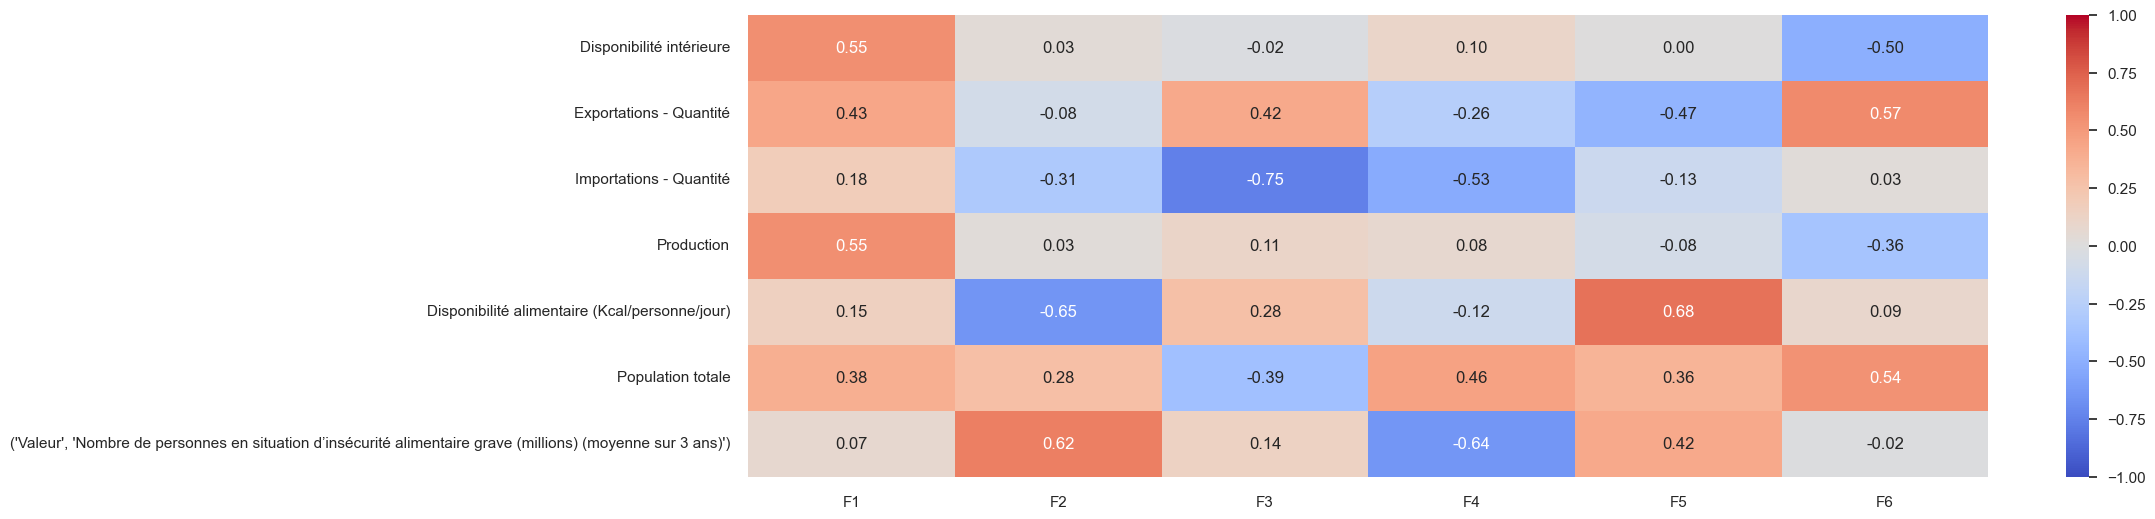

In [87]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

## 4- Graphique de Correlation

Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes. Comme - en code - on commence à compter à partir de 0, cela nous donne :

In [88]:
x, y = 0,1

Pour la partie graphique :

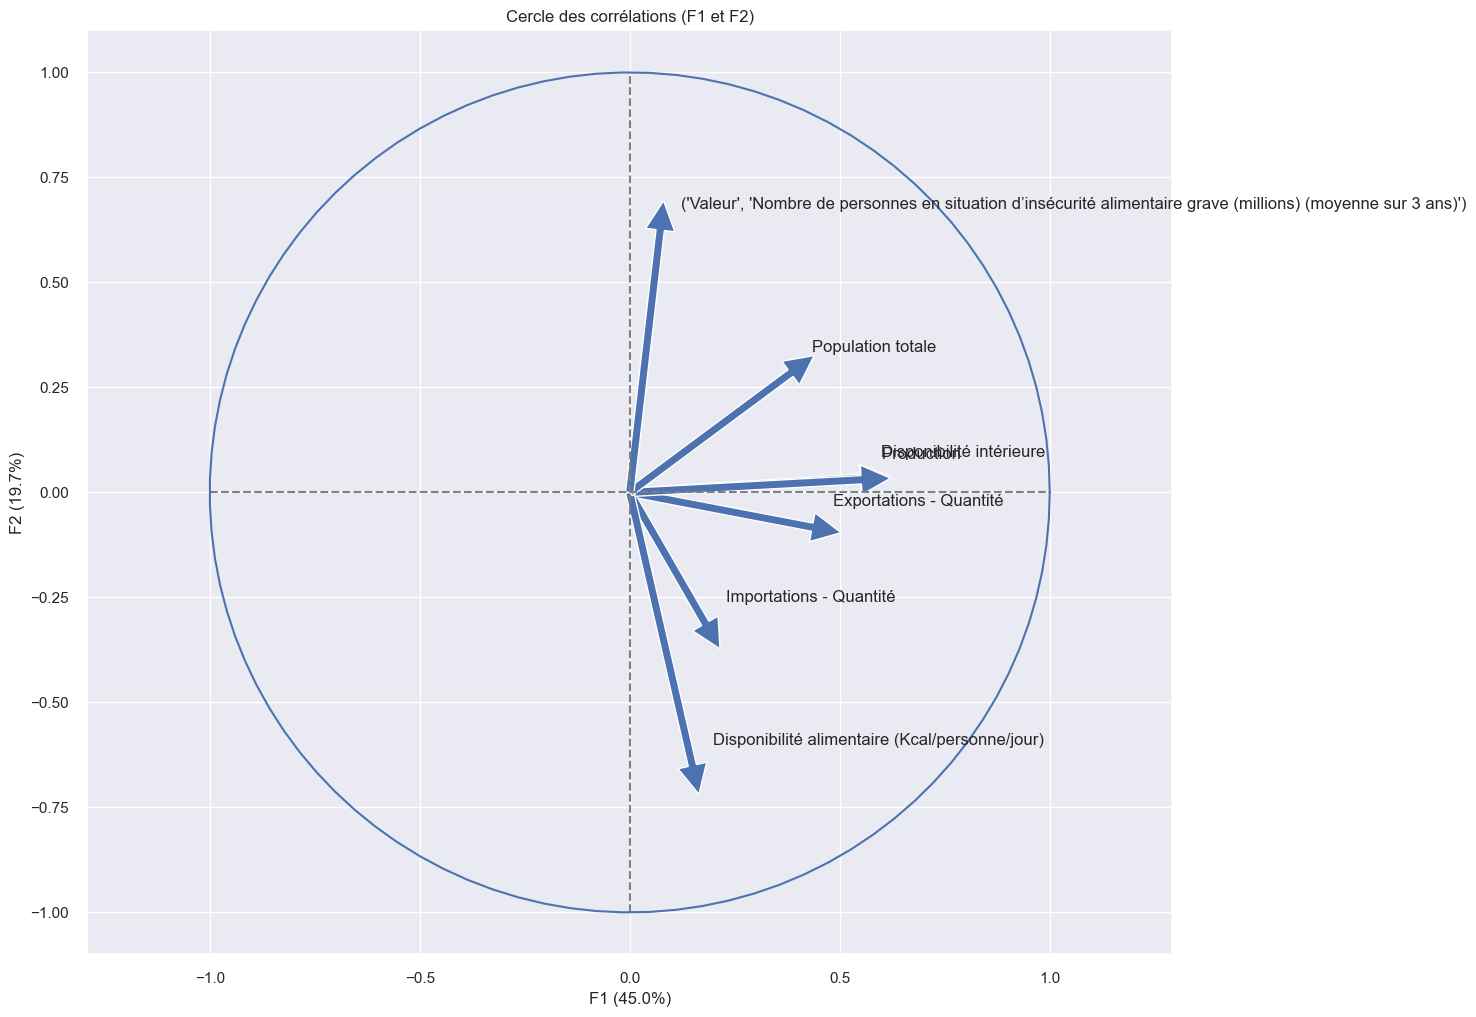

In [89]:
fig, ax = plt.subplots(figsize=(14, 12))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

Les lignes horizontales et verticales tracées représentent les axes des composantes principales. Elles indiquent la proportion de variance expliquée par chaque composante principale.

Dans ce graphique, on peut voir que les variables "Population totale" et "Disponibilité intérieure" sont plus corrélées avec la première composante principale (PC1). Tandis que les variables "Valeur , Nombre de ..." et "Disponibilité alimentaire ..." sont fortement corrélées avec la deuxième composante principale (PC2). Par ailleurs, la variable "Disponibilité alimentaire ..." qui a la direction de sa flèche pointé vers le bas est négativement corrélée à la composante (PC2).

Les variables "Exportations - Quantité" et "Importations - Quantité" ont une corrélation plus faible avec les composantes principales, car leurs flèches sont plus courtes et plus proches du centre du cercle.

Cette visualisation est utile pour identifier les variables qui ont une influence importante sur les composantes principales, et peut aider à comprendre les relations entre les variables dans les données analysées.

On peut en faire une fonction :

In [90]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

Essayons cette fonction pour F1 et F2

"ATTENTION"  Encore une fois Pour F1 et F2 il faut bien préciser 0 et 1

In [91]:
x_y = (0,1)
x_y

(0, 1)

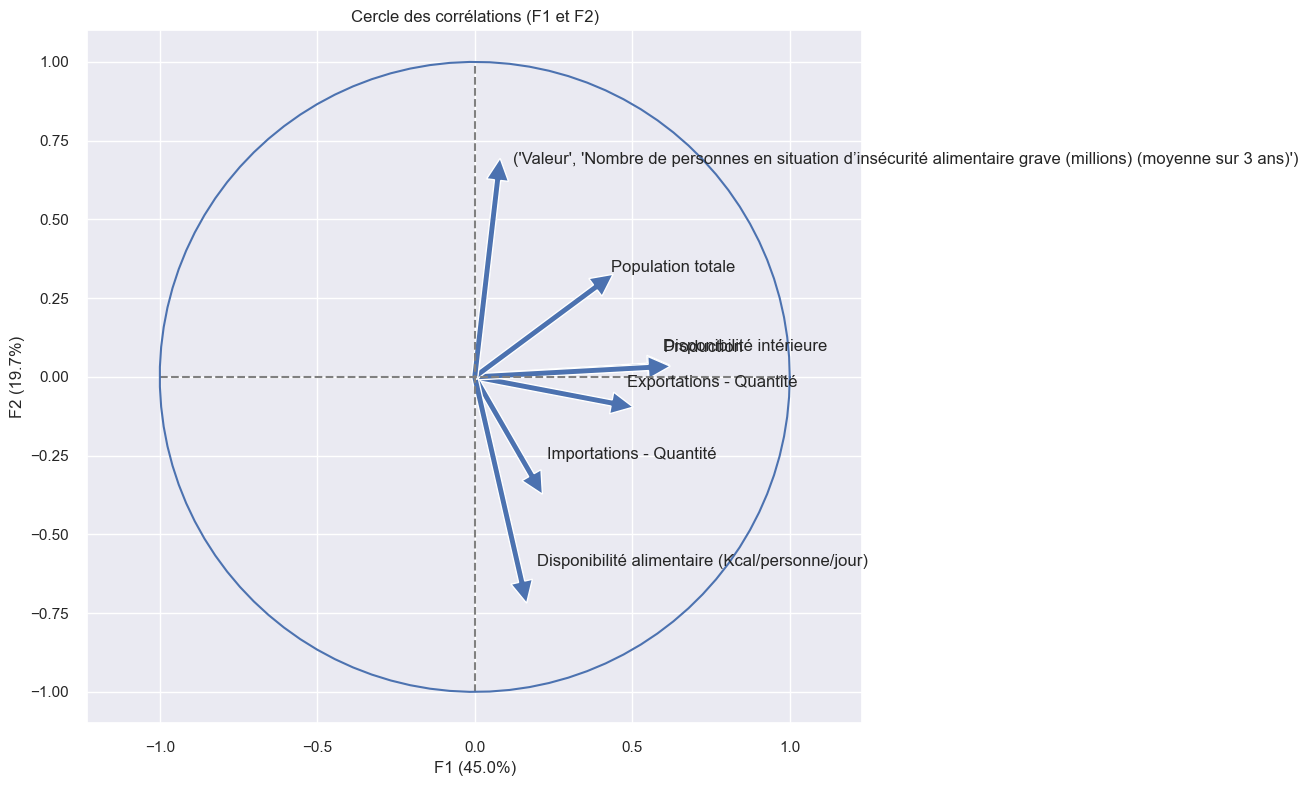

In [92]:
correlation_graph(pca, x_y, features)

Les lignes horizontales et verticales tracées représentent les axes des composantes principales. Elles indiquent la proportion de variance expliquée par chaque composante principale.

Dans ce graphique, on peut voir que les variables "Population totale" et "Disponibilité intérieure" sont plus corrélées avec la première composante principale (PC1). Tandis que les variables "Valeur , Nombre de ..." et "Disponibilité alimentaire ..." sont fortement corrélées avec la deuxième composante principale (PC2). Par ailleurs, la variable "Disponibilité alimentaire ..." qui a la direction de sa flèche pointé vers le bas est négativement corrélée à la composante (PC2).

Les variables "Exportations - Quantité" et "Importations - Quantité" ont une corrélation plus faible avec les composantes principales, car leurs flèches sont plus courtes et plus proches du centre du cercle.

Cette visualisation est utile pour identifier les variables qui ont une influence importante sur les composantes principales, et peut aider à comprendre les relations entre les variables dans les données analysées.

Essayons pour F3 et F4 :

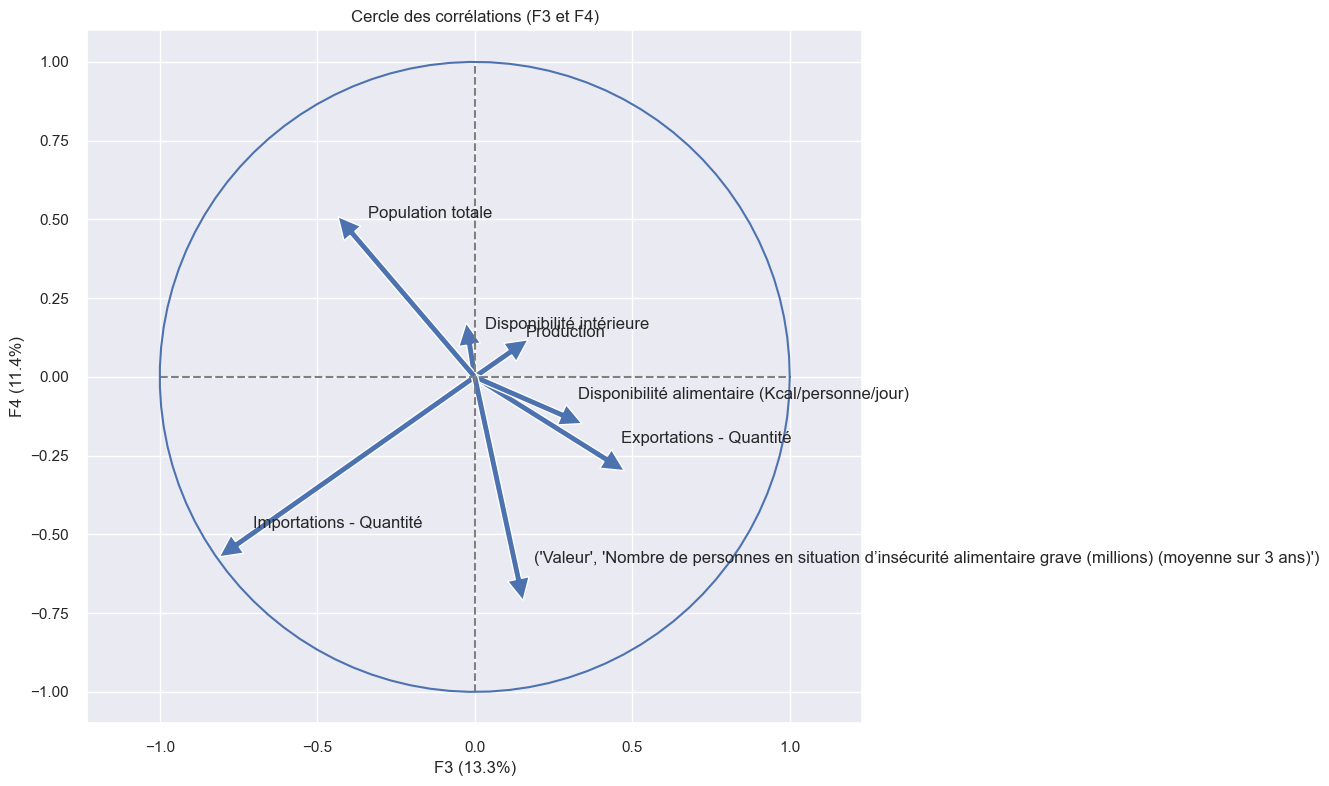

In [93]:
correlation_graph(pca, (2,3), features)

# Essayons avec F3 et F4 :

# x_y = 1,2

Les lignes horizontales et verticales tracées représentent les axes des composantes principales. Elles indiquent la proportion de variance expliquée par chaque composante principale.

Dans ce graphique, on peut voir les variables "Valeur,Nombre de ..." et "Population totale"  sont corrélées avec la quatrième composante principale (PC4), Par ailleurs, la variable "Valeur,Nombre de ..." qui a la direction de sa fleche pointé vers le bas est  négativement et corrélée à la composante (PC4). tandis que la variable "Importations - Quantité" est fortement plus  corrélée avec la troixième et quatrième composante principale (PC3 et PC4)

Les variables "Exportations - Quantité", "Disponibilité intérieure", "Production", "Disponibilité alimentaire ..."  ont une corrélation plus faible avec les composantes principales, car leurs flèches sont plus courtes et plus proches du centre du cercle.

Cette visualisation est utile pour identifier les variables qui ont une influence importante sur les composantes principales, et peut aider à comprendre les relations entre les variables dans les données analysées.

Essayons pour F5 et F6 :

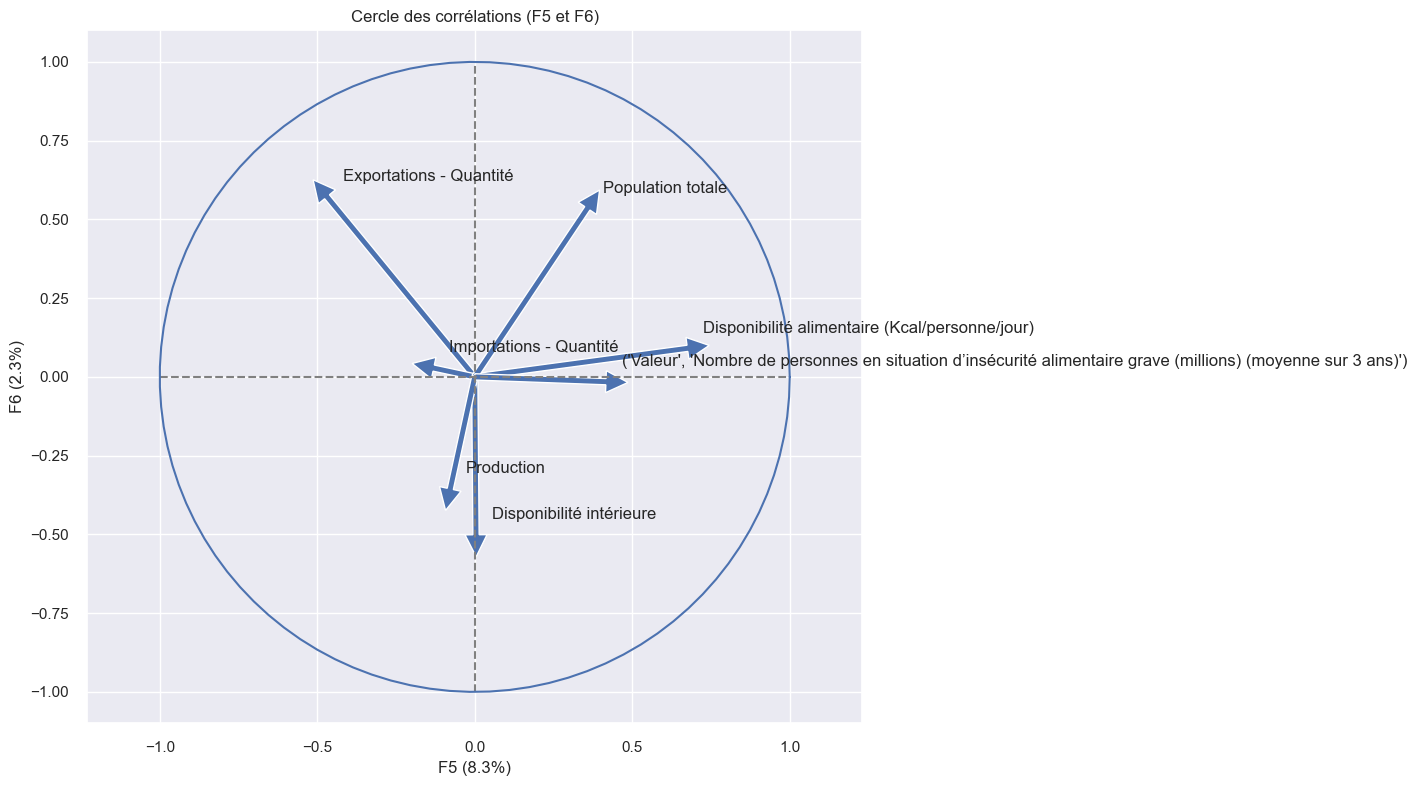

In [94]:
correlation_graph(pca, (4,5), features)

Les lignes horizontales et verticales tracées représentent les axes des composantes principales. Elles indiquent la proportion de variance expliquée par chaque composante principale.

Dans ce graphique, on peut voir la variable "Disponibilité alimentaire ..." est plus corrélée avec la cinquième composante principale (PC5). tandis que les variables "Exportations - Quantité" et "Population totale" sont fortement corrélées positivement avec la sixième composante principale (PC6),

Les variables "Disponibilité intérieure", "Production", "Importations - Quantité", "Valeur,Nombre de ..." ont une corrélation plus faible avec les composantes principales, car leurs flèches sont plus courtes et plus proches du centre du cercle.

Cette visualisation est utile pour identifier les variables qui ont une influence importante sur les composantes principales, et peut aider à comprendre les relations entre les variables dans les données analysées.

## 5- Projection

Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :

In [95]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-0.4801676 ,  1.52897225,  0.07523869, -0.48642416, -0.2571593 ,
         0.09263181],
       [ 1.09258178, -1.64693462, -1.54257576, -0.90164324,  0.36592323,
        -0.33079958],
       [-0.59786632, -0.31195636,  0.16252686,  0.25463051,  0.07224813,
        -0.04275397],
       [-0.49327202,  1.20926435,  0.08916472, -0.10528331, -0.05506106,
        -0.11582489],
       [ 1.73834599, -1.39246858, -2.72134304, -2.08199368, -1.14267401,
         0.54290933]])

Rappelons que :

In [96]:
x_y

(0, 1)

In [97]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

Essayons la version simple avec F1 et F2, les couleurs correspondent au niveau de difficulté :

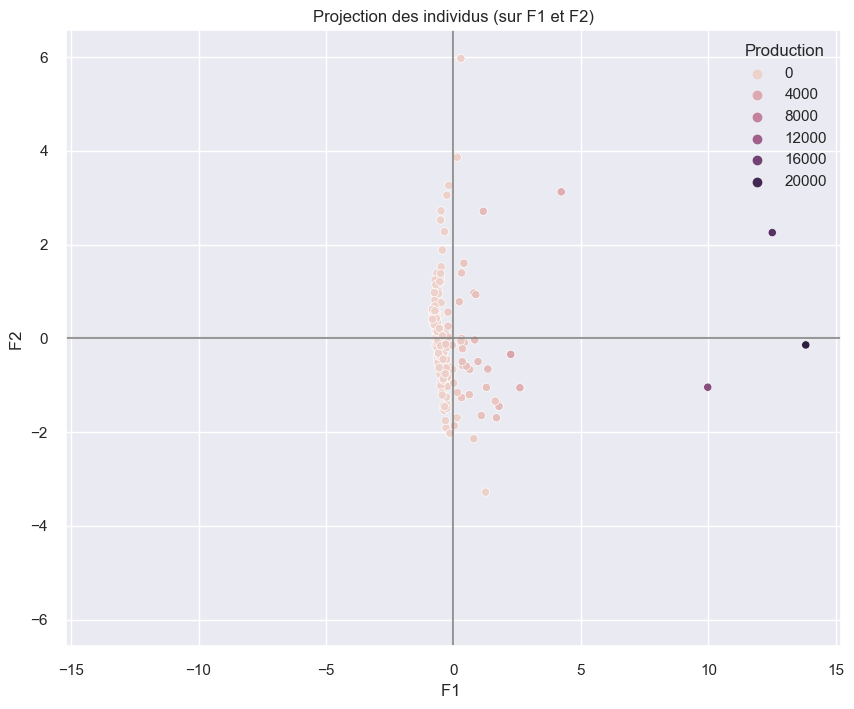

In [133]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=daframe_final['Production'])

Intéressant, mais il manque quelques éléments...

Essayons la version plus élaborée avec F1 et F2 :

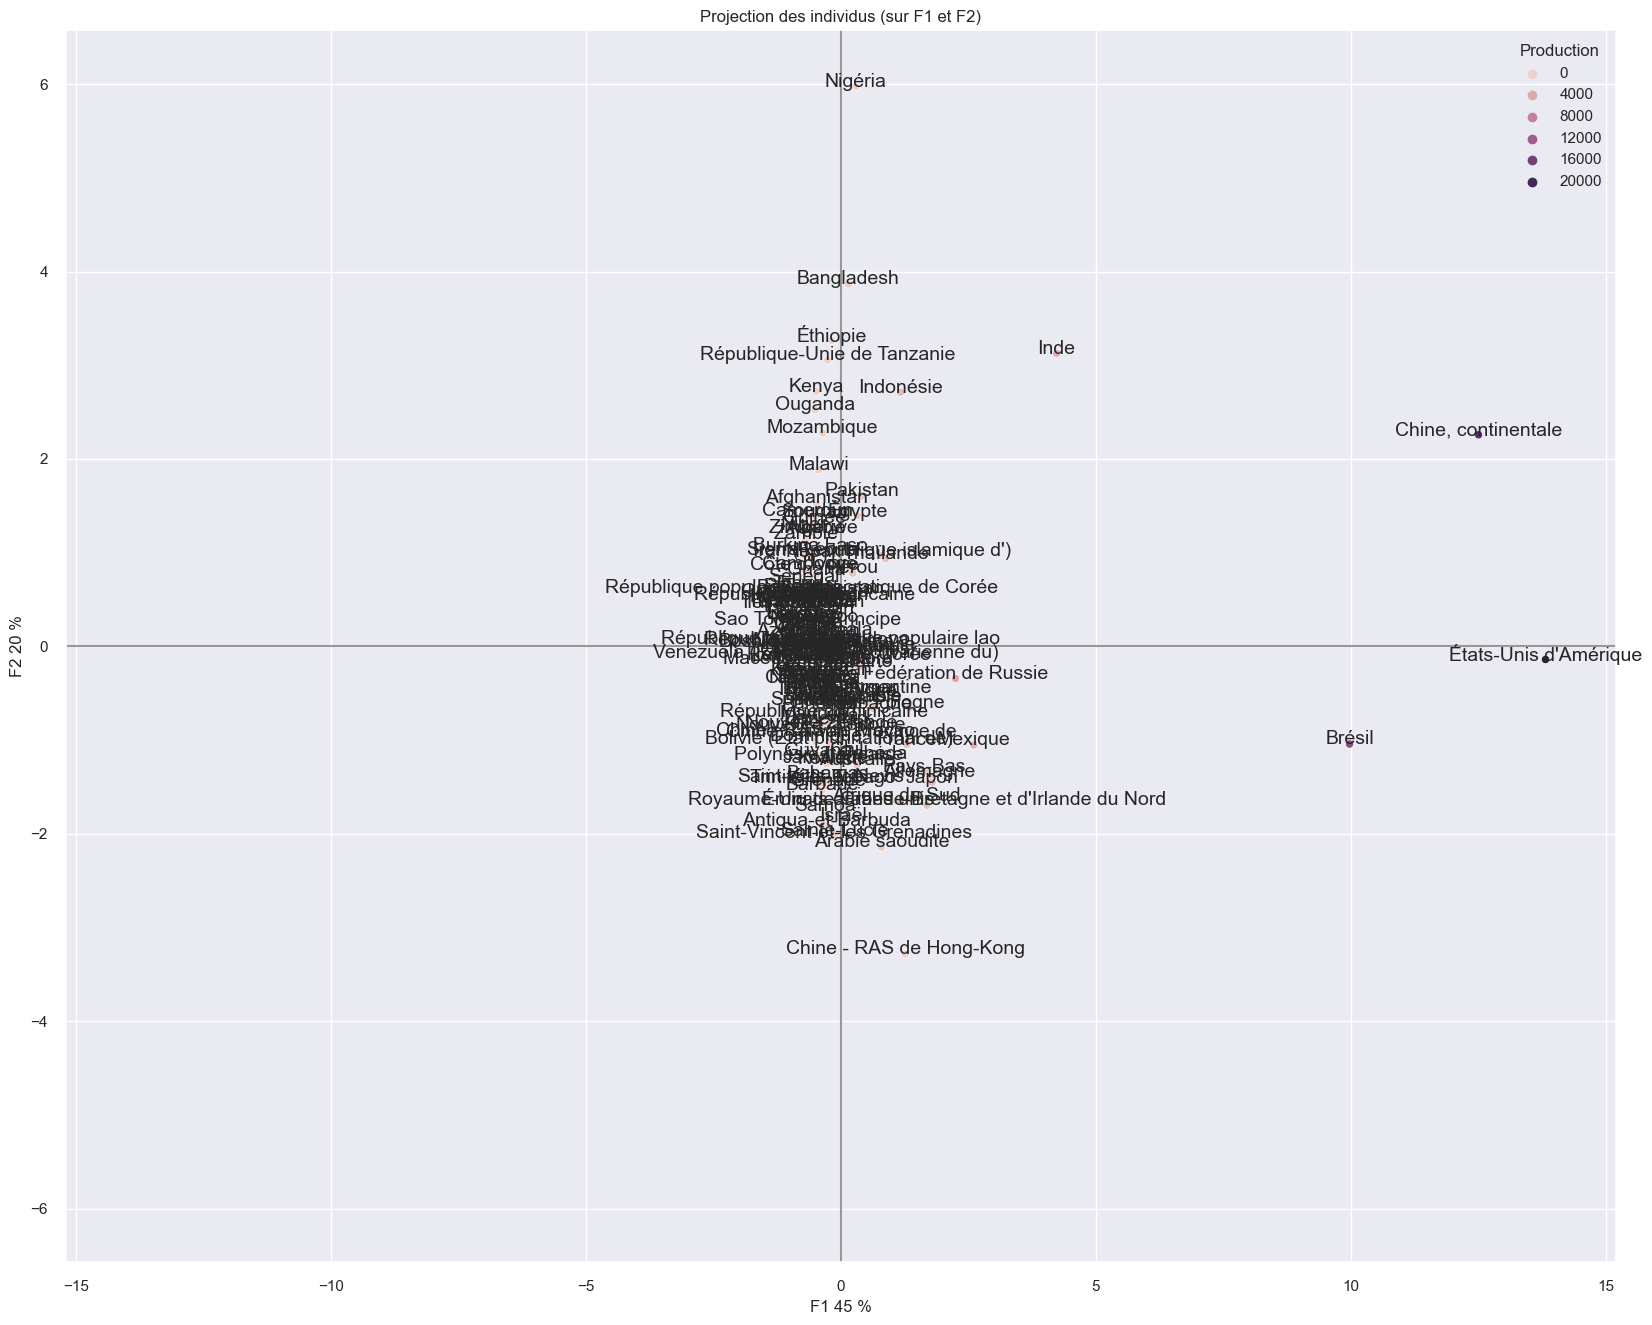

In [134]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names,
                         figsize=(20,16), clusters=daframe_final['Production'],
                         marker="o")

Essayons encore plus mieux avec F1 et F2 :

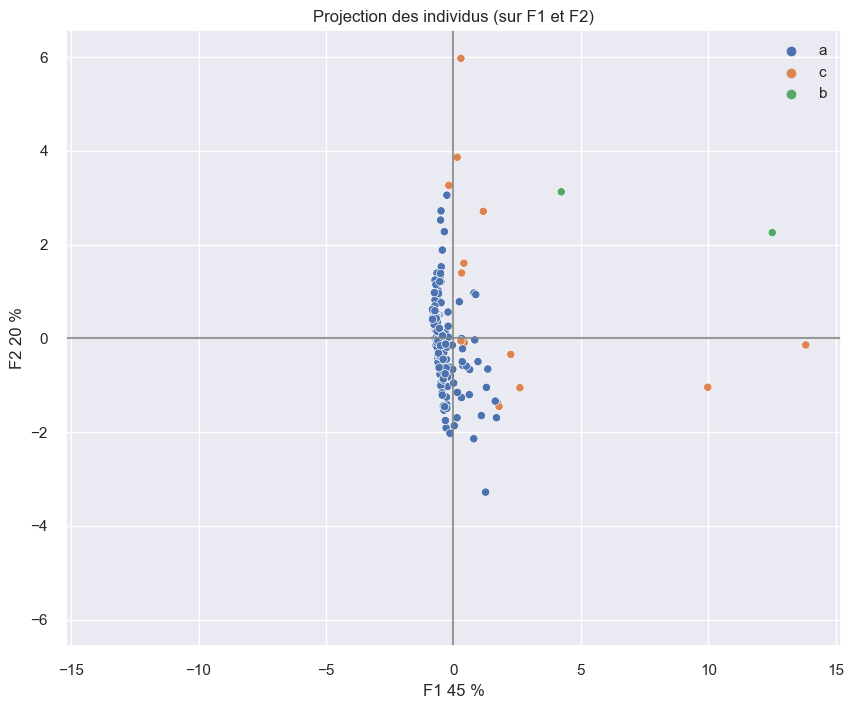

In [135]:
display_factorial_planes(X_proj,  
                         x_y=(0,1), 
                         clusters=labels, 
                         pca=pca, 
                         figsize=(10, 8), 
                         alpha=1 )

Nous pouvons observer que le cluster a represente la majorité des zones ou les populations où l'insécurité alimentaire est moins élevée, mais pas aussi grave que dans le cluster C. le cluster b, quant à lui il represente les zones stables avec une absence d'insécurité alimentaire . 

Encore mieux, grace à plotly :

In [136]:
fig = px.scatter_3d(x=daframe_final.iloc[:,0], y=daframe_final.iloc[:,1], z=daframe_final.iloc[:, 2],
              color=labels)
fig.show()

## 6- K-means

Nous allons effectuer un clustering avec l'algorithme du k-means.

Testons tout d'abord avec un nombre défini de clusters.

On instancie notre estimateur:

In [102]:
kmeans = KMeans(n_clusters=3)

On l'entraine :

In [103]:
kmeans.fit(X)

KMeans(n_clusters=3)

On peut calculer son inertie :

In [104]:
kmeans.inertia_

119129642530.08762

## 7- Utilisons la méthode du coude

Passons à la méthode du coude.

On défini d'abord une liste vide pour sotcker nos inerties:

In [105]:
intertia = []

On défini ensuite la liste du nombre de clusters que l'on veut tester:

In [106]:
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

Ensuite, pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie :

In [107]:
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X) 
  intertia.append(kmeans.inertia_)

Nous obtenons une liste d'inerties :

In [108]:
intertia

[4008168831717.767,
 390508937004.6576,
 119129642530.08762,
 58903168612.79901,
 33868892290.48001,
 21900208777.49191,
 16460062803.285559,
 12792555769.57502,
 8819186090.163128]

Il ne nous reste plus qu'à afficher le resultat :

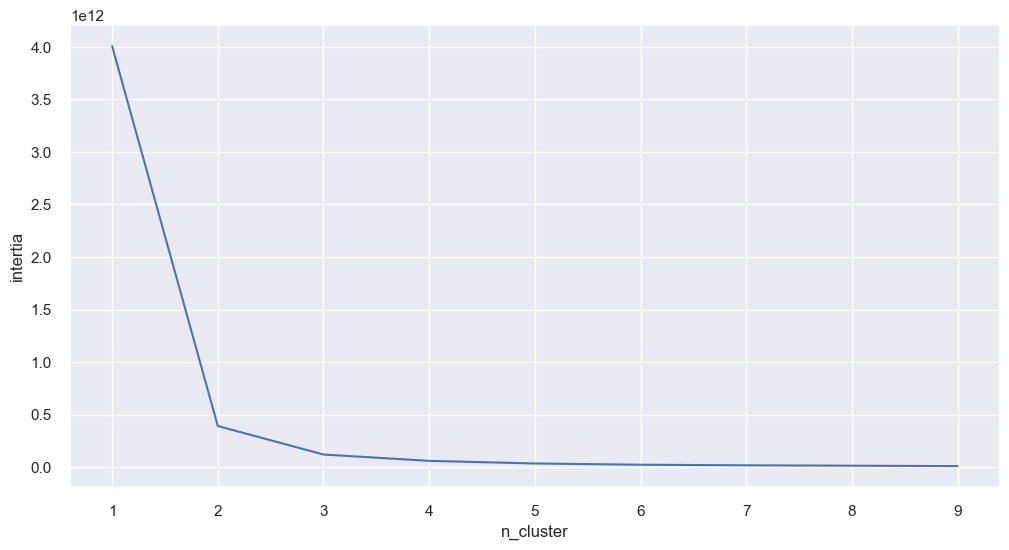

In [109]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

## 8- Clusters

Regardons maintenant les clusters que nous avons obtenus.

Nous devons d'abord ré-entrainer un estimateur:

In [110]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

Voici les clusters :

In [111]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0])

- ATTENTION

Ici, 0,1,2 sont à considérer comme une variable catégorielle cardinale. Il n'y a pas d'ordre entre les clusters.

Le cluster 0 n'est pas supérieur au cluster 1 par exemple. Considérez que c'est plus un id qu'une valeur.



Pour être plus clair, nous allons utiliser des lettres plutôt que des nombres:

In [112]:
# nous allons utiliser des lettres plutôt que des nombres

dd = {i:j for i,j in enumerate(list("abc"))}
dd

{0: 'a', 1: 'b', 2: 'c'}

In [113]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']

In [145]:
# Normalisons la dataframe daframe_final

from sklearn.preprocessing import MinMaxScaler

df_test = daframe_final.copy()
list_col = df_test.columns[0:-1]

scaler = MinMaxScaler()

df_test[list_col] = scaler.fit_transform(df_test[list_col])

In [146]:
df_test

Disponibilité intérieure  Exportations - Quantité  \
pays                                                                       
Afghanistan                            0.003011                 0.031301   
Afrique du Sud                         0.115856                 0.014918   
Albanie                                0.002464                 0.000000   
Algérie                                0.015057                 0.000000   
Allemagne                              0.095105                 0.152972   
...                                         ...                      ...   
Émirats arabes unis                    0.022449                 0.022259   
Équateur                               0.018561                 0.000000   
États-Unis d'Amérique                  1.000000                 0.874260   
Éthiopie                               0.000657                 0.031301   
Îles Salomon                           0.000055                 0.000000   

                       Importations - Quantité  Production  \
pays                                                         
Afghanistan                           0.027128    0.001278   
Afrique du Sud                        0.480823    0.076070   
Albanie                               0.035547    0.000593   
Algérie                               0.001871    0.012549   
Allemagne                             0.787652    0.069088   
...                                        ...         ...   
Émirats arabes unis                   0.405051    0.002190   
Équateur                              0.000000    0.015515   
États-Unis d'Amérique                 0.115061    1.000000   
Éthiopie                              0.000935    0.000639   
Îles Salomon                          0.005613    0.000000   

                       Disponibilité alimentaire (Kcal/personne/jour)  \
pays                                                                    
Afghanistan                                                  0.020576   
Afrique du Sud                                               0.588477   
Albanie                                                      0.349794   
Algérie                                                      0.090535   
Allemagne                                                    0.292181   
...                                                               ...   
Émirats arabes unis                                          0.604938   
Équateur                                                     0.341564   
États-Unis d'Amérique                                        0.901235   
Éthiopie                                                     0.000000   
Îles Salomon                                                 0.074074   

                       Population totale  \
pays                                       
Afghanistan                     0.025507   
Afrique du Sud                  0.040084   
Albanie                         0.001993   
Algérie                         0.029091   
Allemagne                       0.058134   
...                                  ...   
Émirats arabes unis             0.006640   
Équateur                        0.011776   
États-Unis d'Amérique           0.228740   
Éthiopie                        0.074842   
Îles Salomon                    0.000411   

                       ('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')  \
pays                                                                                                                                  
Afghanistan                                                     0.194103                                                              
Afrique du Sud                                                  0.000000                                                              
Albanie                                                         0.009828                                                              
Algérie                      

In [152]:
df_test["cluster"] = labels
df_test.head()

Disponibilité intérieure  Exportations - Quantité  \
pays                                                                
Afghanistan                     0.003011                 0.031301   
Afrique du Sud                  0.115856                 0.014918   
Albanie                         0.002464                 0.000000   
Algérie                         0.015057                 0.000000   
Allemagne                       0.095105                 0.152972   

                Importations - Quantité  Production  \
pays                                                  
Afghanistan                    0.027128    0.001278   
Afrique du Sud                 0.480823    0.076070   
Albanie                        0.035547    0.000593   
Algérie                        0.001871    0.012549   
Allemagne                      0.787652    0.069088   

                Disponibilité alimentaire (Kcal/personne/jour)  \
pays                                                             
Afghanistan                                           0.020576   
Afrique du Sud                                        0.588477   
Albanie                                               0.349794   
Algérie                                               0.090535   
Allemagne                                             0.292181   

                Population totale  \
pays                                
Afghanistan              0.025507   
Afrique du Sud           0.040084   
Albanie                  0.001993   
Algérie                  0.029091   
Allemagne                0.058134   

                ('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')  \
pays                                                                                                                           
Afghanistan                                              0.194103                                                              
Afrique du Sud                                           0.000000                                                              
Albanie                                                  0.009828                                                              
Algérie                                                  0.149877                                                              
Allemagne                                                0.019656                                                              

               cluster  
pays                    
Afghanistan          a  
Afrique du Sud       a  
Albanie              a  
Algérie              a  
Allemagne            a

Disons que c'est plus clair maintenant...

Ajoutons nos labels à X

In [115]:
daframe_final["cluster"] = labels
daframe_final

Disponibilité intérieure  Exportations - Quantité  \
pays                                                                       
Afghanistan                                57.0               132.185185   
Afrique du Sud                           2118.0                63.000000   
Albanie                                    47.0                 0.000000   
Algérie                                   277.0                 0.000000   
Allemagne                                1739.0               646.000000   
...                                         ...                      ...   
Émirats arabes unis                       412.0                94.000000   
Équateur                                  341.0                 0.000000   
États-Unis d'Amérique                   18266.0              3692.000000   
Éthiopie                                   14.0               132.185185   
Îles Salomon                                3.0                 0.000000   

                       Importations - Quantité  Production  \
pays                                                         
Afghanistan                               29.0        28.0   
Afrique du Sud                           514.0      1667.0   
Albanie                                   38.0        13.0   
Algérie                                    2.0       275.0   
Allemagne                                842.0      1514.0   
...                                        ...         ...   
Émirats arabes unis                      433.0        48.0   
Équateur                                   0.0       340.0   
États-Unis d'Amérique                    123.0     21914.0   
Éthiopie                                   1.0        14.0   
Îles Salomon                               6.0         0.0   

                       Disponibilité alimentaire (Kcal/personne/jour)  \
pays                                                                    
Afghanistan                                                       5.0   
Afrique du Sud                                                  143.0   
Albanie                                                          85.0   
Algérie                                                          22.0   
Allemagne                                                        71.0   
...                                                               ...   
Émirats arabes unis                                             147.0   
Équateur                                                         83.0   
États-Unis d'Amérique                                           219.0   
Éthiopie                                                          0.0   
Îles Salomon                                                     18.0   

                       Population totale  \
pays                                       
Afghanistan                    36296.113   
Afrique du Sud                 57009.756   
Albanie                         2884.169   
Algérie                        41389.189   
Allemagne                      82658.409   
...                                  ...   
Émirats arabes unis             9487.203   
Équateur                       16785.361   
États-Unis d'Amérique         325084.756   
Éthiopie                      106399.924   
Îles Salomon                     636.039   

                       ('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')  \
pays                                                                                                                                  
Afghanistan                                                          7.9                                                              
Afrique du Sud                                                       0.0                                                              
Albanie                                                              0.4                                                              
Algérie                      

Affichons cela de façon graphique :

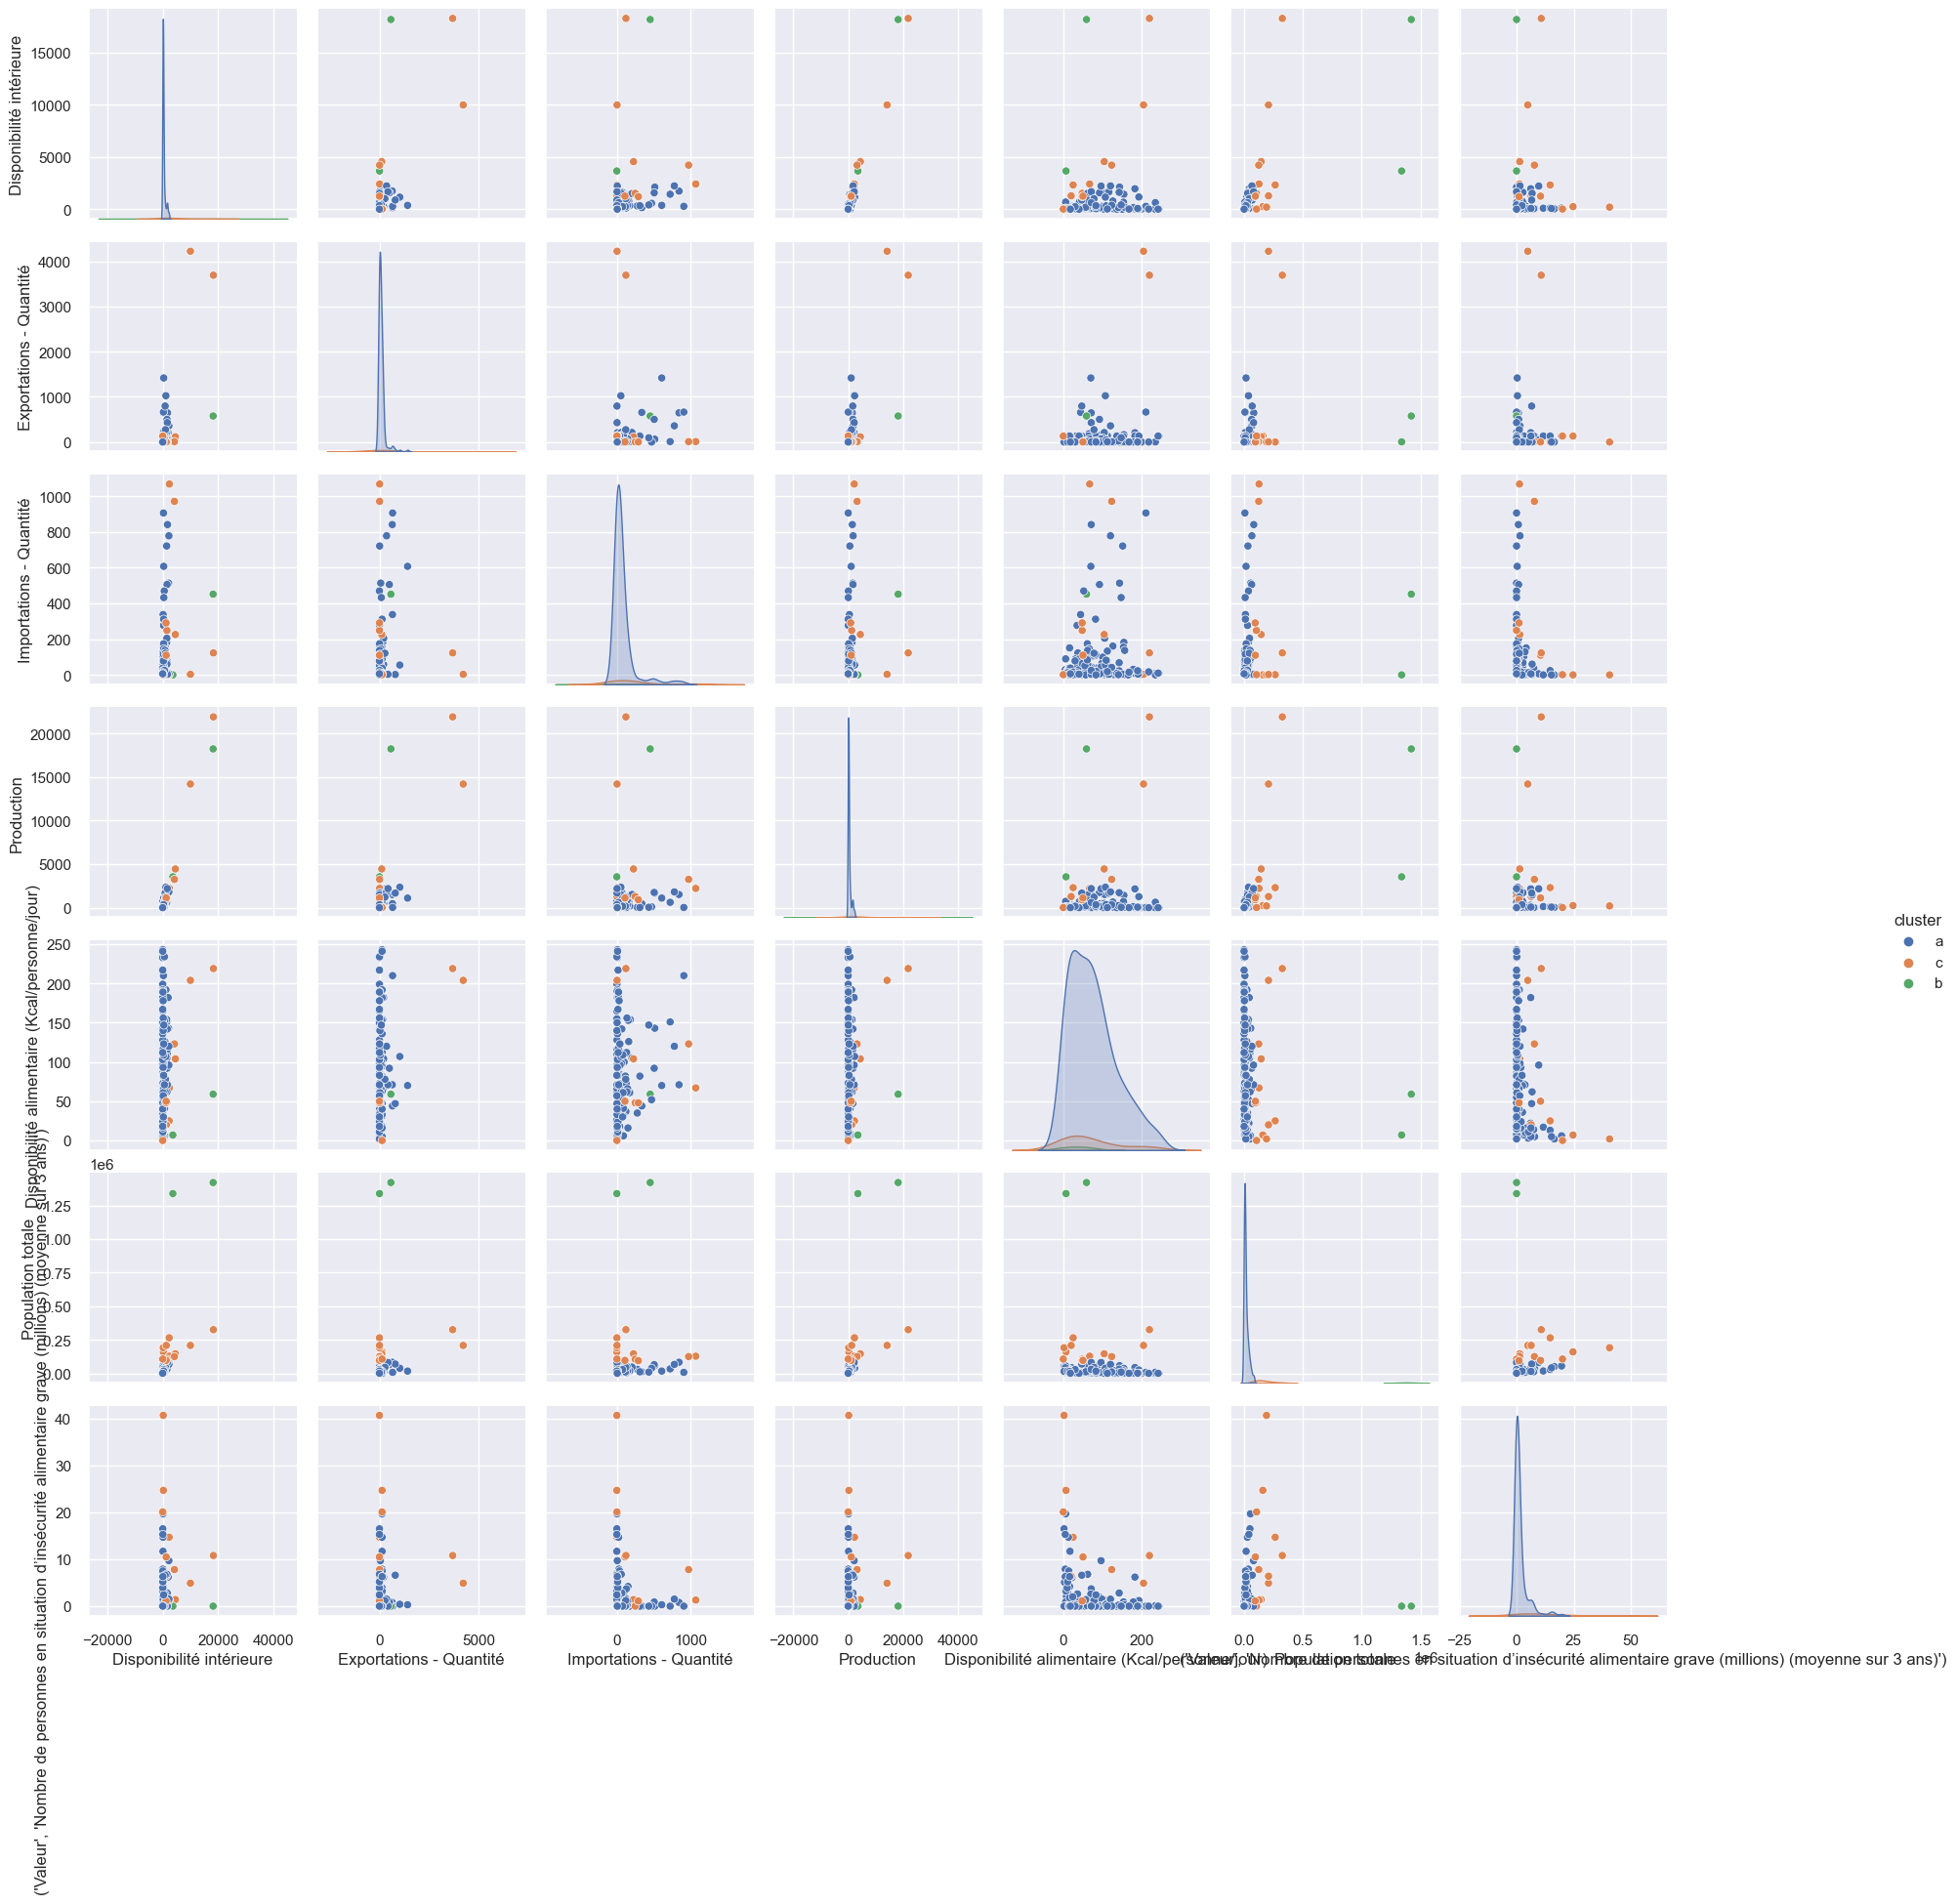

In [116]:
sns.pairplot(daframe_final, hue="cluster");

## 9- Effectuons une classification hiérarchique ascendante.

Par définition, La classification hiérarchique ascendante (CHA) est une technique d'analyse de regroupement non supervisée utilisée pour organiser des données en groupes ou en clusters de manière hiérarchique. En Python, la bibliothèque scikit-learn offre une implémentation de la classification hiérarchique ascendante dans le module sklearn.cluster.

La méthode de classification hiérarchique ascendante commence par considérer chaque point de données comme un cluster individuel. Ensuite, elle fusionne itérativement les clusters les plus similaires en fonction d'une mesure de similarité ou de dissimilarité spécifiée, telle que la distance euclidienne ou la corrélation. Ce processus de fusion continue jusqu'à ce qu'un seul cluster global soit formé, formant ainsi une structure hiérarchique représentée par un dendrogramme.

La bibliothèque scikit-learn propose la classe AgglomerativeClustering pour effectuer la classification hiérarchique ascendante en Python. Cette classe permet de spécifier divers paramètres tels que le nombre de clusters souhaité, le critère de liaison utilisé pour mesurer la similarité, et le type de liaison (complète, simple ou moyenne) utilisé pour agréger les clusters.

Nous allons calculer les distances en spécifiant la méthode à utiliser:

In [117]:
Z = linkage(X, method="ward")
pd.DataFrame(Z)

0      1             2      3
0     45.0  104.0  2.641909e+01    2.0
1     87.0  100.0  3.865406e+01    2.0
2     15.0  120.0  3.867321e+01    2.0
3     17.0   71.0  4.396559e+01    2.0
4     44.0  133.0  4.446195e+01    2.0
..     ...    ...           ...    ...
166  331.0  332.0  1.409849e+05   28.0
167  333.0  336.0  2.276032e+05    9.0
168  337.0  338.0  3.441020e+05  161.0
169  339.0  340.0  7.319293e+05  170.0
170  335.0  341.0  2.689855e+06  172.0

[171 rows x 4 columns]

## 10- Dendrogramme

Nous pouvons désormais afficher le dendrogramme:

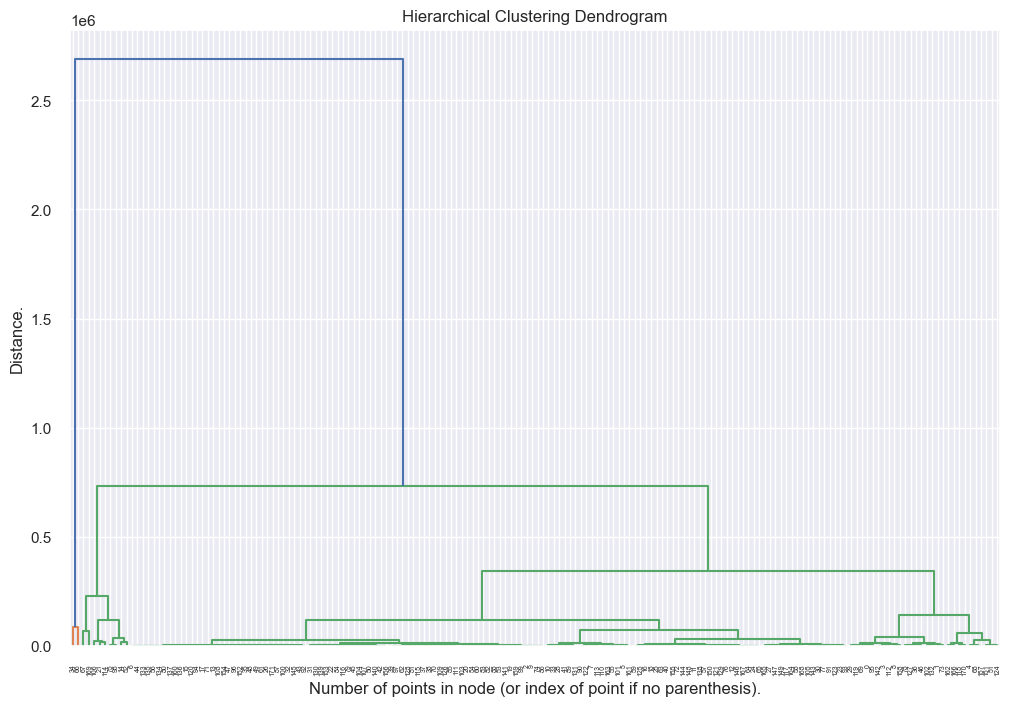

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

# plt.title: Dendrogramme de regroupement hiérarchique
# plt.xlabel : Nombre de points dans le nœud (ou index du point si pas de parenthèse

Le dendrogramme semble pertinent mais sa profondeur le rend illisible.

On peut jouer sur différents paramètres pour obtenir un dendrogramme plus lisible :

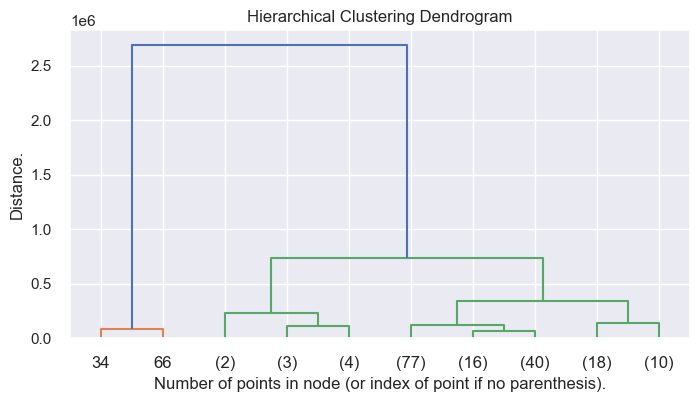

In [119]:
# les arguments p=10, truncate_mode="lastp" signifient que l'on ne va afficher que 10 clusters

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

_ = dendrogram(Z, p=10, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()


# plt.title: Dendrogramme de regroupement hiérarchique
# plt.xlabel : Nombre de points dans le nœud (ou index du point si pas de parenthèse

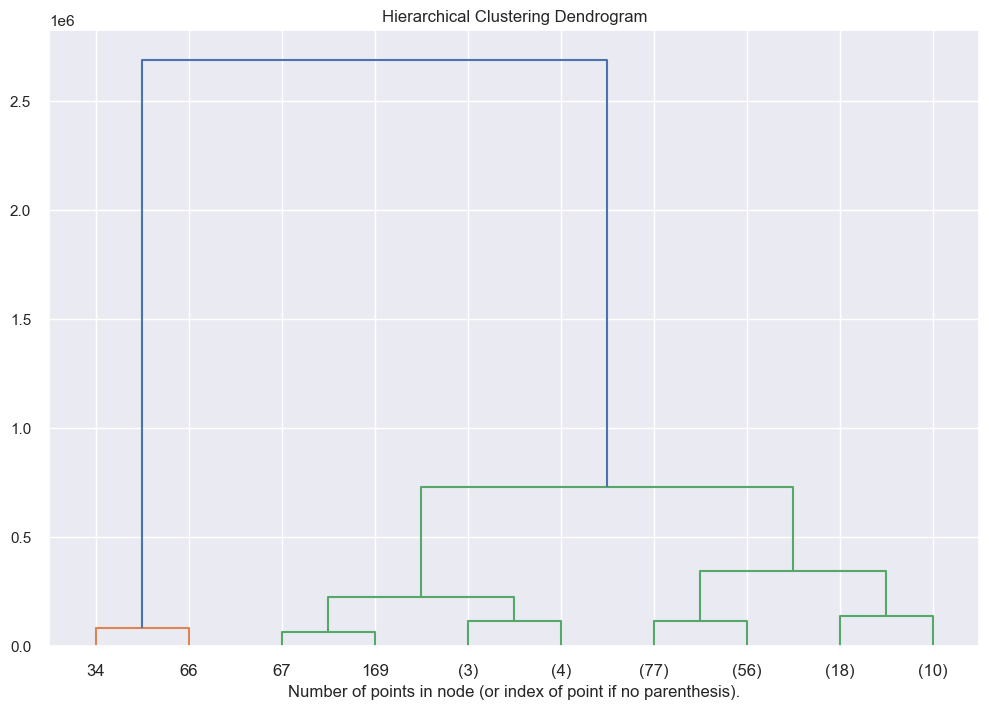

In [120]:
#  les arguments p=3, truncate_mode="level"signifient que l'on ne va afficher que les clusters issus de 3 noeuds.

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=3, truncate_mode="level", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# plt.title: Dendrogramme de regroupement hiérarchique
# plt.xlabel : Nombre de points dans le nœud (ou index du point si pas de parenthèse

## 11- Centroïde

In [121]:
daframe_final.head()

Disponibilité intérieure  Exportations - Quantité  \
pays                                                                
Afghanistan                         57.0               132.185185   
Afrique du Sud                    2118.0                63.000000   
Albanie                             47.0                 0.000000   
Algérie                            277.0                 0.000000   
Allemagne                         1739.0               646.000000   

                Importations - Quantité  Production  \
pays                                                  
Afghanistan                        29.0        28.0   
Afrique du Sud                    514.0      1667.0   
Albanie                            38.0        13.0   
Algérie                             2.0       275.0   
Allemagne                         842.0      1514.0   

                Disponibilité alimentaire (Kcal/personne/jour)  \
pays                                                             
Afghanistan                                                5.0   
Afrique du Sud                                           143.0   
Albanie                                                   85.0   
Algérie                                                   22.0   
Allemagne                                                 71.0   

                Population totale  \
pays                                
Afghanistan             36296.113   
Afrique du Sud          57009.756   
Albanie                  2884.169   
Algérie                 41389.189   
Allemagne               82658.409   

                ('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')  \
pays                                                                                                                           
Afghanistan                                                   7.9                                                              
Afrique du Sud                                                0.0                                                              
Albanie                                                       0.4                                                              
Algérie                                                       6.1                                                              
Allemagne                                                     0.8                                                              

               cluster  
pays                    
Afghanistan          a  
Afrique du Sud       a  
Albanie              a  
Algérie              a  
Allemagne            a

In [122]:
# Normalisons la dataframe daframe_final

from sklearn.preprocessing import MinMaxScaler

df_test = daframe_final.copy()
list_col = df_test.columns[0:-1]

scaler = MinMaxScaler()

df_test[list_col] = scaler.fit_transform(df_test[list_col])

In [123]:
df_test

Disponibilité intérieure  Exportations - Quantité  \
pays                                                                       
Afghanistan                            0.003011                 0.031301   
Afrique du Sud                         0.115856                 0.014918   
Albanie                                0.002464                 0.000000   
Algérie                                0.015057                 0.000000   
Allemagne                              0.095105                 0.152972   
...                                         ...                      ...   
Émirats arabes unis                    0.022449                 0.022259   
Équateur                               0.018561                 0.000000   
États-Unis d'Amérique                  1.000000                 0.874260   
Éthiopie                               0.000657                 0.031301   
Îles Salomon                           0.000055                 0.000000   

                       Importations - Quantité  Production  \
pays                                                         
Afghanistan                           0.027128    0.001278   
Afrique du Sud                        0.480823    0.076070   
Albanie                               0.035547    0.000593   
Algérie                               0.001871    0.012549   
Allemagne                             0.787652    0.069088   
...                                        ...         ...   
Émirats arabes unis                   0.405051    0.002190   
Équateur                              0.000000    0.015515   
États-Unis d'Amérique                 0.115061    1.000000   
Éthiopie                              0.000935    0.000639   
Îles Salomon                          0.005613    0.000000   

                       Disponibilité alimentaire (Kcal/personne/jour)  \
pays                                                                    
Afghanistan                                                  0.020576   
Afrique du Sud                                               0.588477   
Albanie                                                      0.349794   
Algérie                                                      0.090535   
Allemagne                                                    0.292181   
...                                                               ...   
Émirats arabes unis                                          0.604938   
Équateur                                                     0.341564   
États-Unis d'Amérique                                        0.901235   
Éthiopie                                                     0.000000   
Îles Salomon                                                 0.074074   

                       Population totale  \
pays                                       
Afghanistan                     0.025507   
Afrique du Sud                  0.040084   
Albanie                         0.001993   
Algérie                         0.029091   
Allemagne                       0.058134   
...                                  ...   
Émirats arabes unis             0.006640   
Équateur                        0.011776   
États-Unis d'Amérique           0.228740   
Éthiopie                        0.074842   
Îles Salomon                    0.000411   

                       ('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')  \
pays                                                                                                                                  
Afghanistan                                                     0.194103                                                              
Afrique du Sud                                                  0.000000                                                              
Albanie                                                         0.009828                                                              
Algérie                      

In [148]:
# centroïde

centroid_ = df_test.groupby('cluster')[features].mean()

In [149]:
centroid_

Disponibilité intérieure  Exportations - Quantité  \
cluster                                                      
a                        0.016964                 0.020866   
b                        0.597295                 0.068672   
c                        0.199889                 0.151576   

         Importations - Quantité  Production  \
cluster                                        
a                       0.070904    0.014409   
b                       0.211413    0.496965   
c                       0.219256    0.187365   

         Disponibilité alimentaire (Kcal/personne/jour)  Population totale  \
cluster                                                                      
a                                              0.310372           0.010957   
b                                              0.135802           0.971025   
c                                              0.290282           0.116702   

         ('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')  
cluster                                                                                                                
a                                                 0.035603                                                             
b                                                 0.000000                                                             
c                                                 0.272916

In [157]:
centroid_ = centroid_.reset_index()

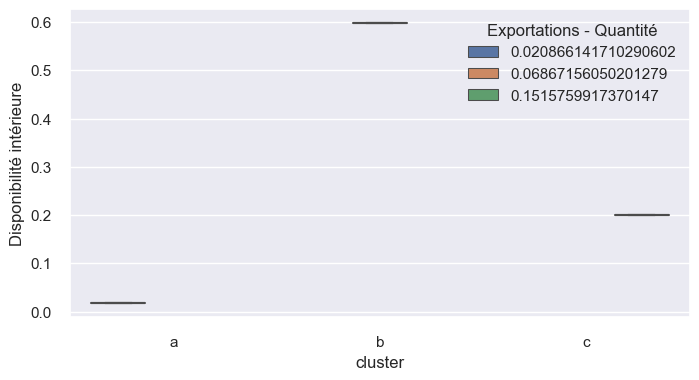

In [161]:
# Distribution des "cluster" selon la "Disponibilité intérieure" et le "Exportations - Quantité"

plt.figure(figsize=(8,4))   # pour agrandire le graphique ( boite à moustache)

sns.boxplot(x = 'cluster', y = 'Disponibilité intérieure', hue = 'Exportations - Quantité', data = centroid_);

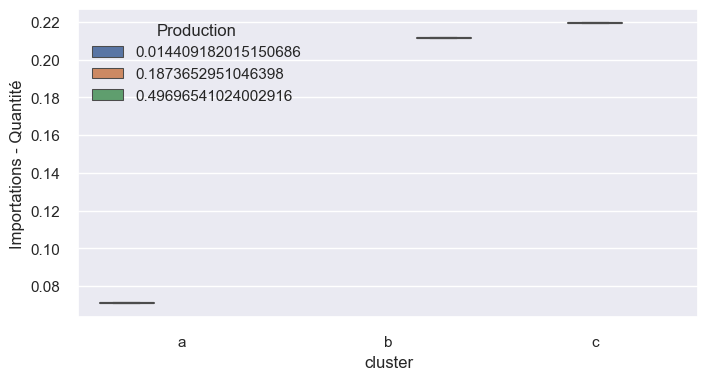

In [162]:
# Distribution des "cluster" selon la "Importations - Quantité" et le "Production"

plt.figure(figsize=(8,4))   # pour agrandire le graphique ( boite à moustache)

sns.boxplot(x = 'cluster', y = 'Importations - Quantité', hue = 'Production', data = centroid_);

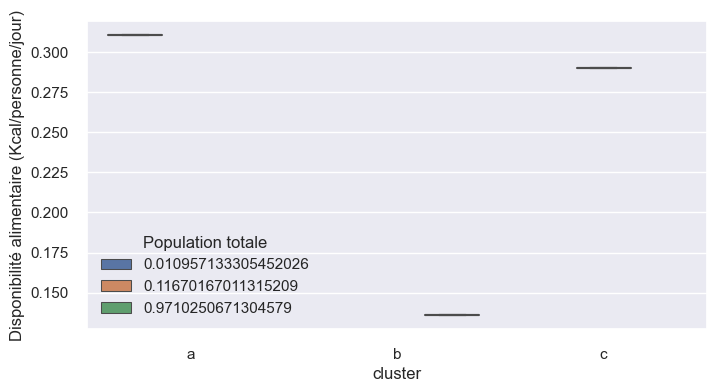

In [163]:
# Distribution des "cluster" selon la "Disponibilité alimentaire (Kcal/personne/jour)" et le "Population totale"

plt.figure(figsize=(8,4))   # pour agrandire le graphique ( boite à moustache)

sns.boxplot(x = 'cluster', y = 'Disponibilité alimentaire (Kcal/personne/jour)', hue = 'Population totale', data = centroid_);

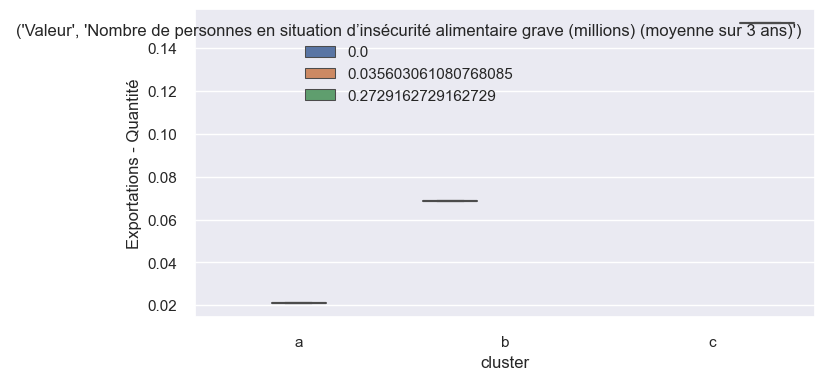

In [165]:
# Distribution des "cluster" selon la "('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions)
   # (moyenne sur 3 ans)')" et le "Exportations - Quantité"

plt.figure(figsize=(8,4))   # pour agrandire le graphique ( boite à moustache)

sns.boxplot(x = 'cluster',
            y = 'Exportations - Quantité',
            hue = "('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')", data = centroid_);

In [166]:
centroid_

cluster  Disponibilité intérieure  Exportations - Quantité  \
0       a                  0.016964                 0.020866   
1       b                  0.597295                 0.068672   
2       c                  0.199889                 0.151576   

   Importations - Quantité  Production  \
0                 0.070904    0.014409   
1                 0.211413    0.496965   
2                 0.219256    0.187365   

   Disponibilité alimentaire (Kcal/personne/jour)  Population totale  \
0                                        0.310372           0.010957   
1                                        0.135802           0.971025   
2                                        0.290282           0.116702   

   ('Valeur', 'Nombre de personnes en situation d’insécurité alimentaire grave (millions) (moyenne sur 3 ans)')  
0                                           0.035603                                                             
1                                           0.000000                                                             
2                                           0.272916

Les centroïdes sont des valeurs représentatives de chaque cluster qui peuvent être interprétées comme suit pour le Nombre de personnes en situation d’insécurité alimentaire grave:

- Le cluster A, avec un centroïde d'insécurité alimentaire de 0.035603, peut représenter les zones tel que ( la France, la Croatie, le Danemark, l ’Afrique du sud …) ou les populations où l'insécurité alimentaire est peu élevée, mais pas aussi grave que dans le cluster C. Ces régions peuvent avoir des ressources limitées mais suffisantes pour fournir une certaine assistance alimentaire à leur population.


- Le cluster B, avec un centroïde d'insécurité alimentaire de 0.000000, peut indiquer des zones comme ( la Chine continentale et l’Inde) ou des populations où il n'y a pas ou très peu d'insécurité alimentaire grave. Ces régions peuvent avoir une situation alimentaire stable et suffisamment de ressources pour subvenir aux besoins de leur population.


- Le cluster C, avec un centroïde d'insécurité alimentaire de 0.272916, peut représenter les zones tel que (le Nigeria, l’Ethiopie, l’Indonésie…) ou les populations où l'insécurité alimentaire est très élevée et grave. Ces régions peuvent avoir des besoins urgents en termes d'aide alimentaire et nécessiter des interventions immédiates pour prévenir la famine ou la malnutrition.

SUGGESTION

Pour ma part, je conseillerais à l'entreprise "La poule qui chante", specialisé dans d’agroalimentaire qui souhaiterait  se développer à l'international de choisir les zones issues du cluster a.

car, avec un centroïde d'insécurité alimentaire de 0.035603 le cluster "a" est moins éloigné du clusters "b" qui indiquer des zones ou des populations ont  très peu d'insécurité alimentaire grave, avec des régions stables et suffisamment de ressources.
De plus, les zones issues du cluster "a" importe moins par rapport au deux autres clusters "b" et "c". 
En effet, s'implenter dans ses pays teleque le Danemark, l'Allemagne, la Côte d'Ivoire, l'Afrique du Sud etc, est un atout majeur pour une entreprise qui voudrait lancer une partie de sa filiale. parce que la majorité des Pays issues du cluster "a" ont des systemes ploitiques et sécuritaire stables.

Il est donc important de vérifier si ce cluster est réellement représentatif d'un groupe distinct ou s'il s'agit d'une valeur aberrante ou d'une erreur dans les données.
En outre, il pourrait être intéressant de se pencher sur les facteurs qui influencent la situation d'insécurité alimentaire.

In [126]:
# Centroide de notre dataframe normalisé

centroid_map = df_test.groupby('cluster')[features].mean()

## 12- Carte de chaleur des centroides

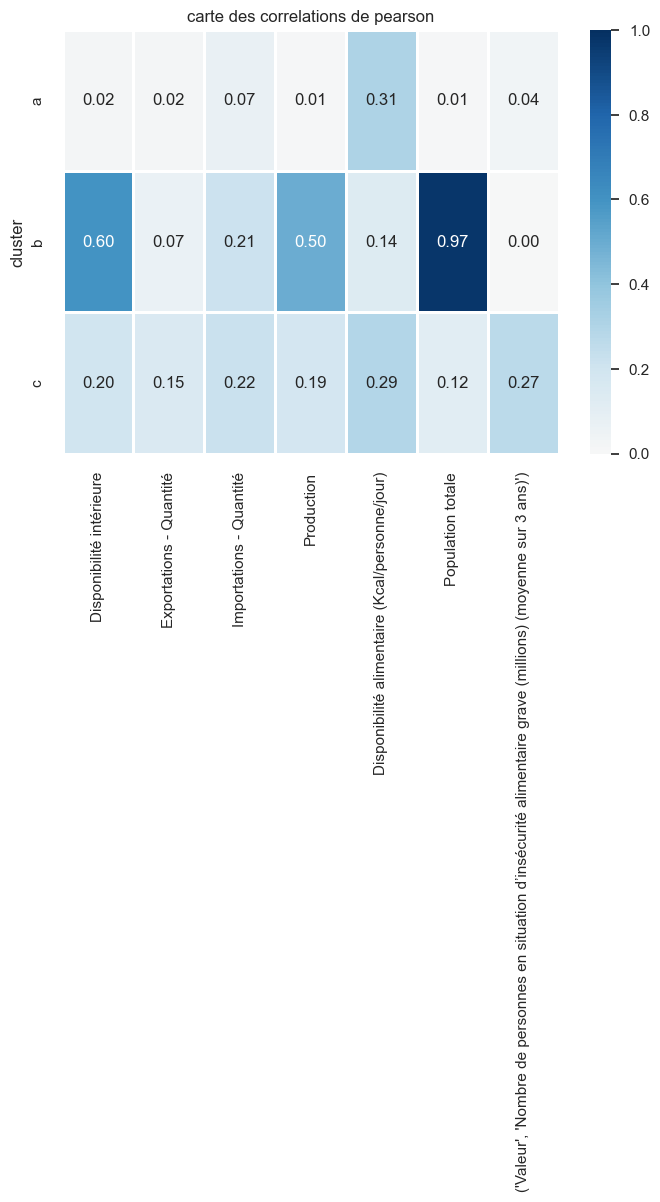

In [128]:
# Carte de chaleur des centroides (heatmap)

mask = np.triu(np.ones_like(centroid_map, dtype='bool'))
sns.heatmap(centroid_map, center=0,
            cmap="RdBu", linewidths=1,
            annot=True, fmt=".2f", vmin=0, vmax=1)
plt.title("carte des correlations de pearson")
plt.show()

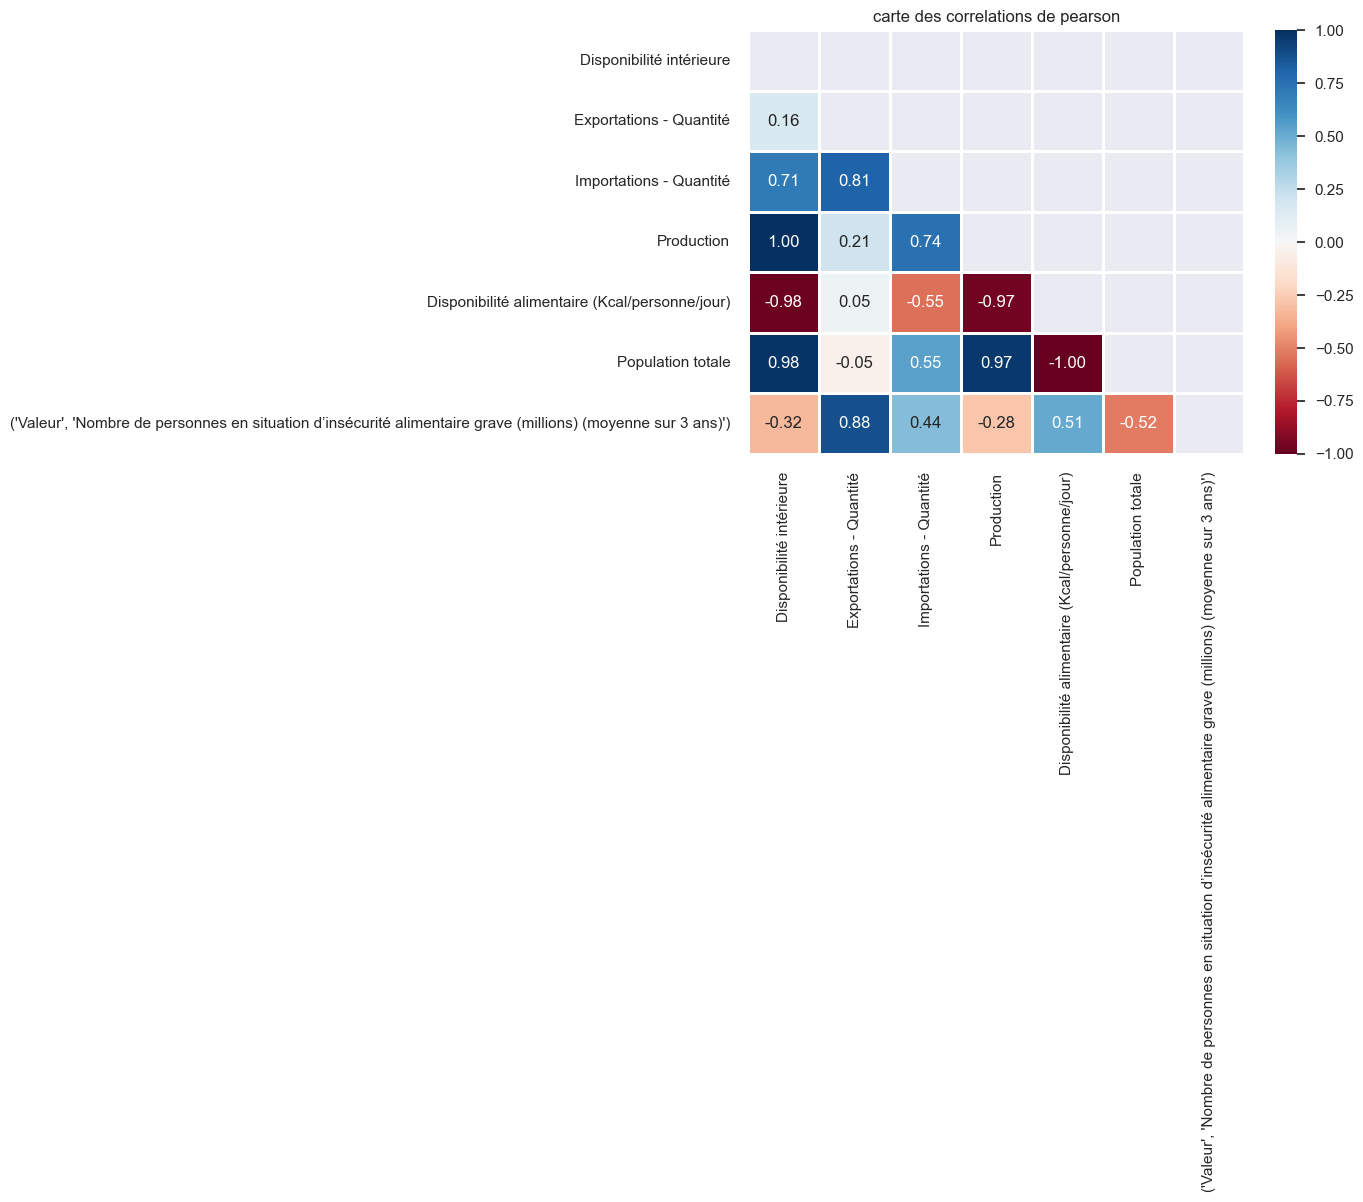

In [129]:
# CARTE DE CORRELATION AMELIOREE   "A DEPLACER"

mask = np.triu(np.ones_like(centroid_.corr(), dtype='bool'))
sns.heatmap(centroid_.corr(), mask=mask, center=0,
            cmap="RdBu", linewidths=1,
            annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("carte des correlations de pearson")
plt.show()

In [153]:
# On peut aussi intégré l'index ou la variable qualitative "pays" 

T = df_test.groupby(['cluster', 'pays'])[features].mean()

In [154]:
T.head(50)

Disponibilité intérieure  \
cluster pays                                                        
a       Afghanistan                                      0.003011   
        Afrique du Sud                                   0.115856   
        Albanie                                          0.002464   
        Algérie                                          0.015057   
        Allemagne                                        0.095105   
        Angola                                           0.017357   
        Antigua-et-Barbuda                               0.000274   
        Arabie saoudite                                  0.078460   
        Argentine                                        0.107315   
        Arménie                                          0.002464   
        Australie                                        0.064006   
        Autriche                                         0.009363   
        Azerbaïdjan                                      0.006954   
        Bahamas                                          0.001314   
        Barbade                                          0.000821   
        Belgique                                         0.008213   
        Belize                                           0.000931   
        Bolivie (État plurinational de)                  0.023379   
        Bosnie-Herzégovine                               0.002902   
        Botswana                                         0.000274   
        Bulgarie                                         0.008487   
        Burkina Faso                                     0.002409   
        Bélarus                                          0.014400   
        Bénin                                            0.008706   
        Cabo Verde                                       0.000438   
        Cambodge                                         0.001971   
        Cameroun                                         0.004380   
        Canada                                           0.078351   
        Chili                                            0.036684   
        Chine - RAS de Hong-Kong                         0.015221   
        Chine - RAS de Macao                             0.000931   
        Chine, Taiwan Province de                        0.042871   
        Chypre                                           0.001971   
        Colombie                                         0.089849   
        Congo                                            0.005913   
        Costa Rica                                       0.007227   
        Croatie                                          0.002354   
        Cuba                                             0.018616   
        Côte d'Ivoire                                    0.003449   
        Danemark                                         0.009034   
        Djibouti                                         0.000055   
        Dominique                                        0.000110   
        El Salvador                                      0.007063   
        Espagne                                          0.081855   
        Estonie                                          0.001478   
        Eswatini                                         0.000274   
        Fidji                                            0.001314   
        Finlande                                         0.005968   
        France                                           0.086016   
        Gabon                                            0.004161   

                                         Exportations - Quantité  \
cluster pays                                                       
a       Afghanistan                                     0.031301   
        Afrique du Sud                                  0.014918   
        Albanie                                         0.000000   
        Algérie                                         0.000000   
        Allemagne                           

In [155]:
T.tail(50)

Disponibilité intérieure  \
cluster pays                                                               
a       Saint-Kitts-et-Nevis                                    0.000110   
        Saint-Vincent-et-les Grenadines                         0.000329   
        Sainte-Lucie                                            0.000493   
        Samoa                                                   0.000712   
        Sao Tomé-et-Principe                                    0.000000   
        Serbie                                                  0.004818   
        Sierra Leone                                            0.001533   
        Slovaquie                                               0.003942   
        Slovénie                                                0.002738   
        Soudan                                                  0.003668   
        Sri Lanka                                               0.010403   
        Suisse                                                  0.007173   
        Suriname                                                0.001259   
        Suède                                                   0.010129   
        Sénégal                                                 0.004106   
        Tadjikistan                                             0.002081   
        Tchad                                                   0.000274   
        Tchéquie                                                0.013524   
        Thaïlande                                               0.048127   
        Timor-Leste                                             0.000164   
        Togo                                                    0.002847   
        Trinité-et-Tobago                                       0.004052   
        Tunisie                                                 0.010567   
        Turkménistan                                            0.001369   
        Turquie                                                 0.091546   
        Ukraine                                                 0.055136   
        Uruguay                                                 0.001697   
        Vanuatu                                                 0.000055   
        Venezuela (République bolivarienne du)                  0.034166   
        Yémen                                                   0.013360   
        Zambie                                                  0.003176   
        Zimbabwe                                                0.004052   
        Émirats arabes unis                                     0.022449   
        Équateur                                                0.018561   
        Îles Salomon                                            0.000055   
b       Chine, continentale                                     0.994251   
        Inde                                                    0.200339   
c       Bangladesh                                              0.013579   
        Brésil                                                  0.546430   
        Fédération de Russie                                    0.249343   
        Indonésie                                               0.127081   
        Japon                                                   0.132118   
        Mexique                                                 0.230891   
        Nigéria                                                 0.010951   
        Pakistan                                                0.070083   
        Philippines                                             0.083169   
        Viet Nam                                                0.065922   
        Égypte                                                  0.068331   
        États-Unis d'Amérique                                   1.000000   
        Éthiopie                                                0.000657   

                                                Exportations - Quantité  \
cluster pays        

## 13- Le choix des des methodes entre la classification hiérarchique ascendante (CHA) et le K-means

La classification hiérarchique ascendante (CHA) et le K-means sont deux approches populaires de regroupement de données. Voici une comparaison des deux méthodes, en mettant en évidence leurs avantages et leurs inconvénients :

Classification hiérarchique ascendante (CHA) :

Avantages :

- Ne nécessite pas de spécifier le nombre de clusters à l'avance.
- Fournit une structure hiérarchique des clusters sous forme de dendrogramme.
- Permet d'identifier des regroupements de différentes tailles et formes.
- Peut être utilisée avec diverses mesures de similarité ou de dissimilarité.

Inconvénients :

- Peut être plus coûteuse en termes de temps de calcul pour de grands ensembles de données.
- La complexité de l'interprétation du dendrogramme peut rendre la sélection du nombre optimal de clusters difficile.
- Les résultats peuvent varier en fonction de la mesure de similarité ou de dissimilarité utilisée.

K-means :

Avantages :

- Efficace et rapide, même pour de grandes quantités de données.
- Facile à implémenter et à comprendre.
- Les résultats sont déterministes et reproductibles.
- Convient aux données avec des clusters de forme sphérique et de taille similaire.

Inconvénients :

- Nécessite de spécifier le nombre de clusters à l'avance.
- Sensible aux points de données aberrants ou aux valeurs extrêmes.
- Ne fournit pas de structure hiérarchique des clusters.
- Peut converger vers des optima locaux et ne pas trouver les clusters globaux optimaux.

Il convient de noter que le choix entre la classification hiérarchique ascendante et le K-means dépend du contexte spécifique de l'analyse et des caractéristiques des données. Il est recommandé d'expérimenter les deux approches et de comparer les résultats pour déterminer la méthode la plus appropriée pour une tâche de regroupement particulière. De plus, il existe également d'autres techniques de regroupement telles que le DBSCAN, le regroupement spectral, etc., qui peuvent être considérées en fonction des besoins spécifiques.